# Lead Score Case Study - Logistic Regression

### Importing the Libraries

In [1]:
# Importing required packages:
import numpy as np
import pandas as pd
from datetime import datetime as dt

# For Visualisation we use the below packages:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# To Scale our data we use the below package:
from sklearn.preprocessing import scale

# Supress Warnings by:
import warnings
warnings.filterwarnings('ignore')

from sklearn.datasets import fetch_openml
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.model_selection import train_test_split

# Import MinMax scaler using below packages:
from sklearn.preprocessing import MinMaxScaler
# Scale the three numeric features
scaler = MinMaxScaler()

# Import 'LogisticRegression' using below:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# Import RFE using below:
from sklearn.feature_selection import RFE

# Importing statsmodels using below:
import statsmodels.api as sm

# Importing 'variance_inflation_factor' using below:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Importing metrics from sklearn for evaluation using below:
from sklearn import metrics

from sklearn.metrics import precision_recall_curve

### Reading and Understanding Dataset

In [2]:
#Reading the Data set
leadscore = pd.read_csv("Leads.csv")
leadscore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,No,Select,Select,02.Medium,02.Medium,15.0,15.0,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,No,Select,Mumbai,02.Medium,01.High,13.0,17.0,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,No,Select,Mumbai,02.Medium,01.High,15.0,18.0,No,No,Modified


In [3]:
#checking the size of data
leadscore.size

341880

In [4]:
#checking the columns of data
leadscore.columns

Index(['Prospect ID', 'Lead Number', 'Lead Origin', 'Lead Source',
       'Do Not Email', 'Do Not Call', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'How did you hear about X Education',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search', 'Magazine',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'Receive More Updates About Our Courses', 'Tags', 'Lead Quality',
       'Update me on Supply Chain Content', 'Get updates on DM Content',
       'Lead Profile', 'City', 'Asymmetrique Activity Index',
       'Asymmetrique Profile Index', 'Asymmetrique Activity Score',
       'Asymmetrique Profile Score',
       'I agree to pay the amount through cheque',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [5]:
#statistical summary of the data
leadscore.describe()

,Lead Number,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Asymmetrique Activity Score,Asymmetrique Profile Score
count,9240.000000,9240.000000,9103.000000,9240.000000,9103.000000,5022.000000,5022.000000
mean,617188.435606,0.385390,3.445238,487.698268,2.362820,14.306252,16.344883
std,23405.995698,0.486714,4.854853,548.021466,2.161418,1.386694,1.811395
min,579533.000000,0.000000,0.000000,0.000000,0.000000,7.000000,11.000000
25%,596484.500000,0.000000,1.000000,12.000000,1.000000,14.000000,15.000000
50%,615479.000000,0.000000,3.000000,248.000000,2.000000,14.000000,16.000000
75%,637387.250000,1.000000,5.000000,936.000000,3.000000,15.000000,18.000000
max,660737.000000,1.000000,251.000000,2272.000000,55.000000,18.000000,20.000000


In [6]:
#checking datatypes of the given dataset
leadscore.dtypes

Prospect ID                                       object
Lead Number                                        int64
Lead Origin                                       object
Lead Source                                       object
Do Not Email                                      object
Do Not Call                                       object
Converted                                          int64
TotalVisits                                      float64
Total Time Spent on Website                        int64
Page Views Per Visit                             float64
Last Activity                                     object
Country                                           object
Specialization                                    object
How did you hear about X Education                object
What is your current occupation                   object
What matters most to you in choosing a course     object
Search                                            object
Magazine                       

In [7]:
##Checking the no. of rows and columns
leadscore.shape

(9240, 37)

## Data Cleaning

In [8]:
#checking duplicates
sum(leadscore.duplicated(subset = 'Lead Number')) == 0

True

Note: From the above step we can see that there are no duplicates

In [9]:
# Checking for total count and percentage of null values in all columns of the dataframe.

total = pd.DataFrame(leadscore.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leadscore.isnull().sum()/leadscore.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Lead Quality,4767,51.59
Asymmetrique Activity Index,4218,45.65
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Tags,3353,36.29
Lead Profile,2709,29.32
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63


In [10]:
#Replacing 'Select' value as 'nan'

leadscore = leadscore.replace('Select',np.nan)

In [11]:
# Checking total count and percentage of null values in all columns of the dataframe after 'Select' handling.
total = pd.DataFrame(leadscore.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leadscore.isnull().sum()/leadscore.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
How did you hear about X Education,7250,78.46
Lead Profile,6855,74.19
Lead Quality,4767,51.59
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Activity Index,4218,45.65
Asymmetrique Profile Index,4218,45.65
City,3669,39.71
Specialization,3380,36.58
Tags,3353,36.29


In [12]:
# Checking if there are columns with one unique value as it won't affect our analysis
leadscore.nunique()

Prospect ID                                      9240
Lead Number                                      9240
Lead Origin                                         5
Lead Source                                        21
Do Not Email                                        2
Do Not Call                                         2
Converted                                           2
TotalVisits                                        41
Total Time Spent on Website                      1731
Page Views Per Visit                              114
Last Activity                                      17
Country                                            38
Specialization                                     18
How did you hear about X Education                  9
What is your current occupation                     6
What matters most to you in choosing a course       3
Search                                              2
Magazine                                            1
Newspaper Article           

In [13]:
#Remove columns which has only one unique value and 
#Deleting the following columns as they have only one unique value and hence cannot be responsible in predicting a successful lead case

"""
Magazine
Receive More Updates About Our Courses
Update me on Supply Chain Content
Update me on Supply Chain Content
I agree to pay the amount through cheque

"""   
leadscore= leadscore.loc[:,leadscore.nunique()!=1]
leadscore.shape

(9240, 32)

In [14]:
total = pd.DataFrame(leadscore.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leadscore.isnull().sum()/leadscore.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
How did you hear about X Education,7250,78.46
Lead Profile,6855,74.19
Lead Quality,4767,51.59
Asymmetrique Profile Score,4218,45.65
Asymmetrique Activity Score,4218,45.65
Asymmetrique Profile Index,4218,45.65
Asymmetrique Activity Index,4218,45.65
City,3669,39.71
Specialization,3380,36.58
Tags,3353,36.29


In [15]:
# Removing all the columns that have 35% or more null values and the coloums that are not needed
leadscore2 = leadscore.drop(['Asymmetrique Profile Index','Asymmetrique Activity Index','Asymmetrique Activity Score','Asymmetrique Profile Score','Lead Profile','Tags','Lead Quality','How did you hear about X Education','City','Lead Number'],axis=1)
leadscore2.shape

(9240, 22)

In [16]:
leadscore2.head()

,Prospect ID,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,...,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


In [17]:
leadscore2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [18]:
total = pd.DataFrame(leadscore2.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leadscore2.isnull().sum()/leadscore2.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Specialization,3380,36.58
What matters most to you in choosing a course,2709,29.32
What is your current occupation,2690,29.11
Country,2461,26.63
TotalVisits,137,1.48
Page Views Per Visit,137,1.48
Last Activity,103,1.11
Lead Source,36,0.39
Newspaper Article,0,0.00
A free copy of Mastering The Interview,0,0.00


The top 4 coloumns has highest percentage of null value. Deleteing all those records would lead to loss of data needed for our analysis.So replacing the NaN values with 'not provided'.

In [19]:
leadscore2['Specialization'] = leadscore2['Specialization'].fillna('not provided') 
leadscore2['What matters most to you in choosing a course'] = leadscore2['What matters most to you in choosing a course'].fillna('not provided')
leadscore2['Country'] = leadscore2['Country'].fillna('not provided')
leadscore2['What is your current occupation'] = leadscore2['What is your current occupation'].fillna('not provided')


In [20]:
leadscore2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 22 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Origin                                    9240 non-null   object 
 2   Lead Source                                    9204 non-null   object 
 3   Do Not Email                                   9240 non-null   object 
 4   Do Not Call                                    9240 non-null   object 
 5   Converted                                      9240 non-null   int64  
 6   TotalVisits                                    9103 non-null   float64
 7   Total Time Spent on Website                    9240 non-null   int64  
 8   Page Views Per Visit                           9103 non-null   float64
 9   Last Activity                                  9137 

In [21]:
leadscore2["Specialization"].value_counts()

not provided                         3380
Finance Management                    976
Human Resource Management             848
Marketing Management                  838
Operations Management                 503
Business Administration               403
IT Projects Management                366
Supply Chain Management               349
Banking, Investment And Insurance     338
Travel and Tourism                    203
Media and Advertising                 203
International Business                178
Healthcare Management                 159
Hospitality Management                114
E-COMMERCE                            112
Retail Management                     100
Rural and Agribusiness                 73
E-Business                             57
Services Excellence                    40
Name: Specialization, dtype: int64

In [22]:
total = pd.DataFrame(leadscore2.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leadscore2.isnull().sum()/leadscore2.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
TotalVisits,137,1.48
Page Views Per Visit,137,1.48
Last Activity,103,1.11
Lead Source,36,0.39
Prospect ID,0,0.00
What matters most to you in choosing a course,0,0.00
A free copy of Mastering The Interview,0,0.00
Through Recommendations,0,0.00
Digital Advertisement,0,0.00
Newspaper,0,0.00


In [23]:
# Checking the percent of lose if the null values are removed
round(100*(sum(leadscore2.isnull().sum(axis=1) > 1)/leadscore2.shape[0]),2)

1.48

In [24]:
leadscore3 = leadscore2[leadscore2.isnull().sum(axis=1) <1]

In [25]:
# checking number of rows left in percent

round(100*(leadscore3.shape[0])/(leadscore.shape[0]),2)

98.2

In [26]:
total = pd.DataFrame(leadscore3.isnull().sum().sort_values(ascending=False), columns=['Total'])
percentage = pd.DataFrame(round(100*(leadscore3.isnull().sum()/leadscore3.shape[0]),2).sort_values(ascending=False)\
                          ,columns=['Percentage'])
pd.concat([total, percentage], axis = 1)

,Total,Percentage
Prospect ID,0,0.0
Lead Origin,0,0.0
A free copy of Mastering The Interview,0,0.0
Through Recommendations,0,0.0
Digital Advertisement,0,0.0
Newspaper,0,0.0
X Education Forums,0,0.0
Newspaper Article,0,0.0
Search,0,0.0
What matters most to you in choosing a course,0,0.0


In [27]:
#Bucketing the values of the country column
leadscore3["Country"].value_counts()

India                   6491
not provided            2296
United States             69
United Arab Emirates      53
Singapore                 24
Saudi Arabia              21
United Kingdom            15
Australia                 13
Qatar                     10
Bahrain                    7
Hong Kong                  7
Oman                       6
France                     6
unknown                    5
Kuwait                     4
South Africa               4
Canada                     4
Nigeria                    4
Germany                    4
Sweden                     3
Philippines                2
Uganda                     2
Italy                      2
Bangladesh                 2
Netherlands                2
Asia/Pacific Region        2
China                      2
Belgium                    2
Ghana                      2
Kenya                      1
Sri Lanka                  1
Tanzania                   1
Malaysia                   1
Liberia                    1
Switzerland   

In [28]:
#Bucketing the values of the country column

def slots(x):
    category = ""
    if x == "India":
        category = "india"
    elif x == "not provided":
        category = "not provided"
    else:
        category = "outside india"
    return category

leadscore3['Country'] = leadscore3.apply(lambda x:slots(x['Country']), axis = 1)
leadscore3['Country'].value_counts()

india            6491
not provided     2296
outside india     287
Name: Country, dtype: int64

In [29]:
leadscore.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Tags,Lead Quality,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.0,0,0.0,...,Interested in other courses,Low in Relevance,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.0,674,2.5,...,Ringing,NaN,NaN,NaN,02.Medium,02.Medium,15.0,15.0,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,...,Will revert after reading the email,Might be,Potential Lead,Mumbai,02.Medium,01.High,14.0,20.0,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,...,Ringing,Not Sure,NaN,Mumbai,02.Medium,01.High,13.0,17.0,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,...,Will revert after reading the email,Might be,NaN,Mumbai,02.Medium,01.High,15.0,18.0,No,Modified


In [30]:
# Removing Id values since they are unique for everyone

leadscore_final = leadscore3.drop('Prospect ID',1)
leadscore_final.shape

(9074, 21)

In [31]:
leadscore_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

In [32]:
leadscore_final.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,What is your current occupation,What matters most to you in choosing a course,Search,Newspaper Article,X Education Forums,Newspaper,Digital Advertisement,Through Recommendations,A free copy of Mastering The Interview,Last Notable Activity
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,not provided,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,india,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Email Opened
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,india,...,Student,Better Career Prospects,No,No,No,No,No,No,Yes,Email Opened
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,india,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,india,...,Unemployed,Better Career Prospects,No,No,No,No,No,No,No,Modified


# Univariate Analysis

Categorical Variables

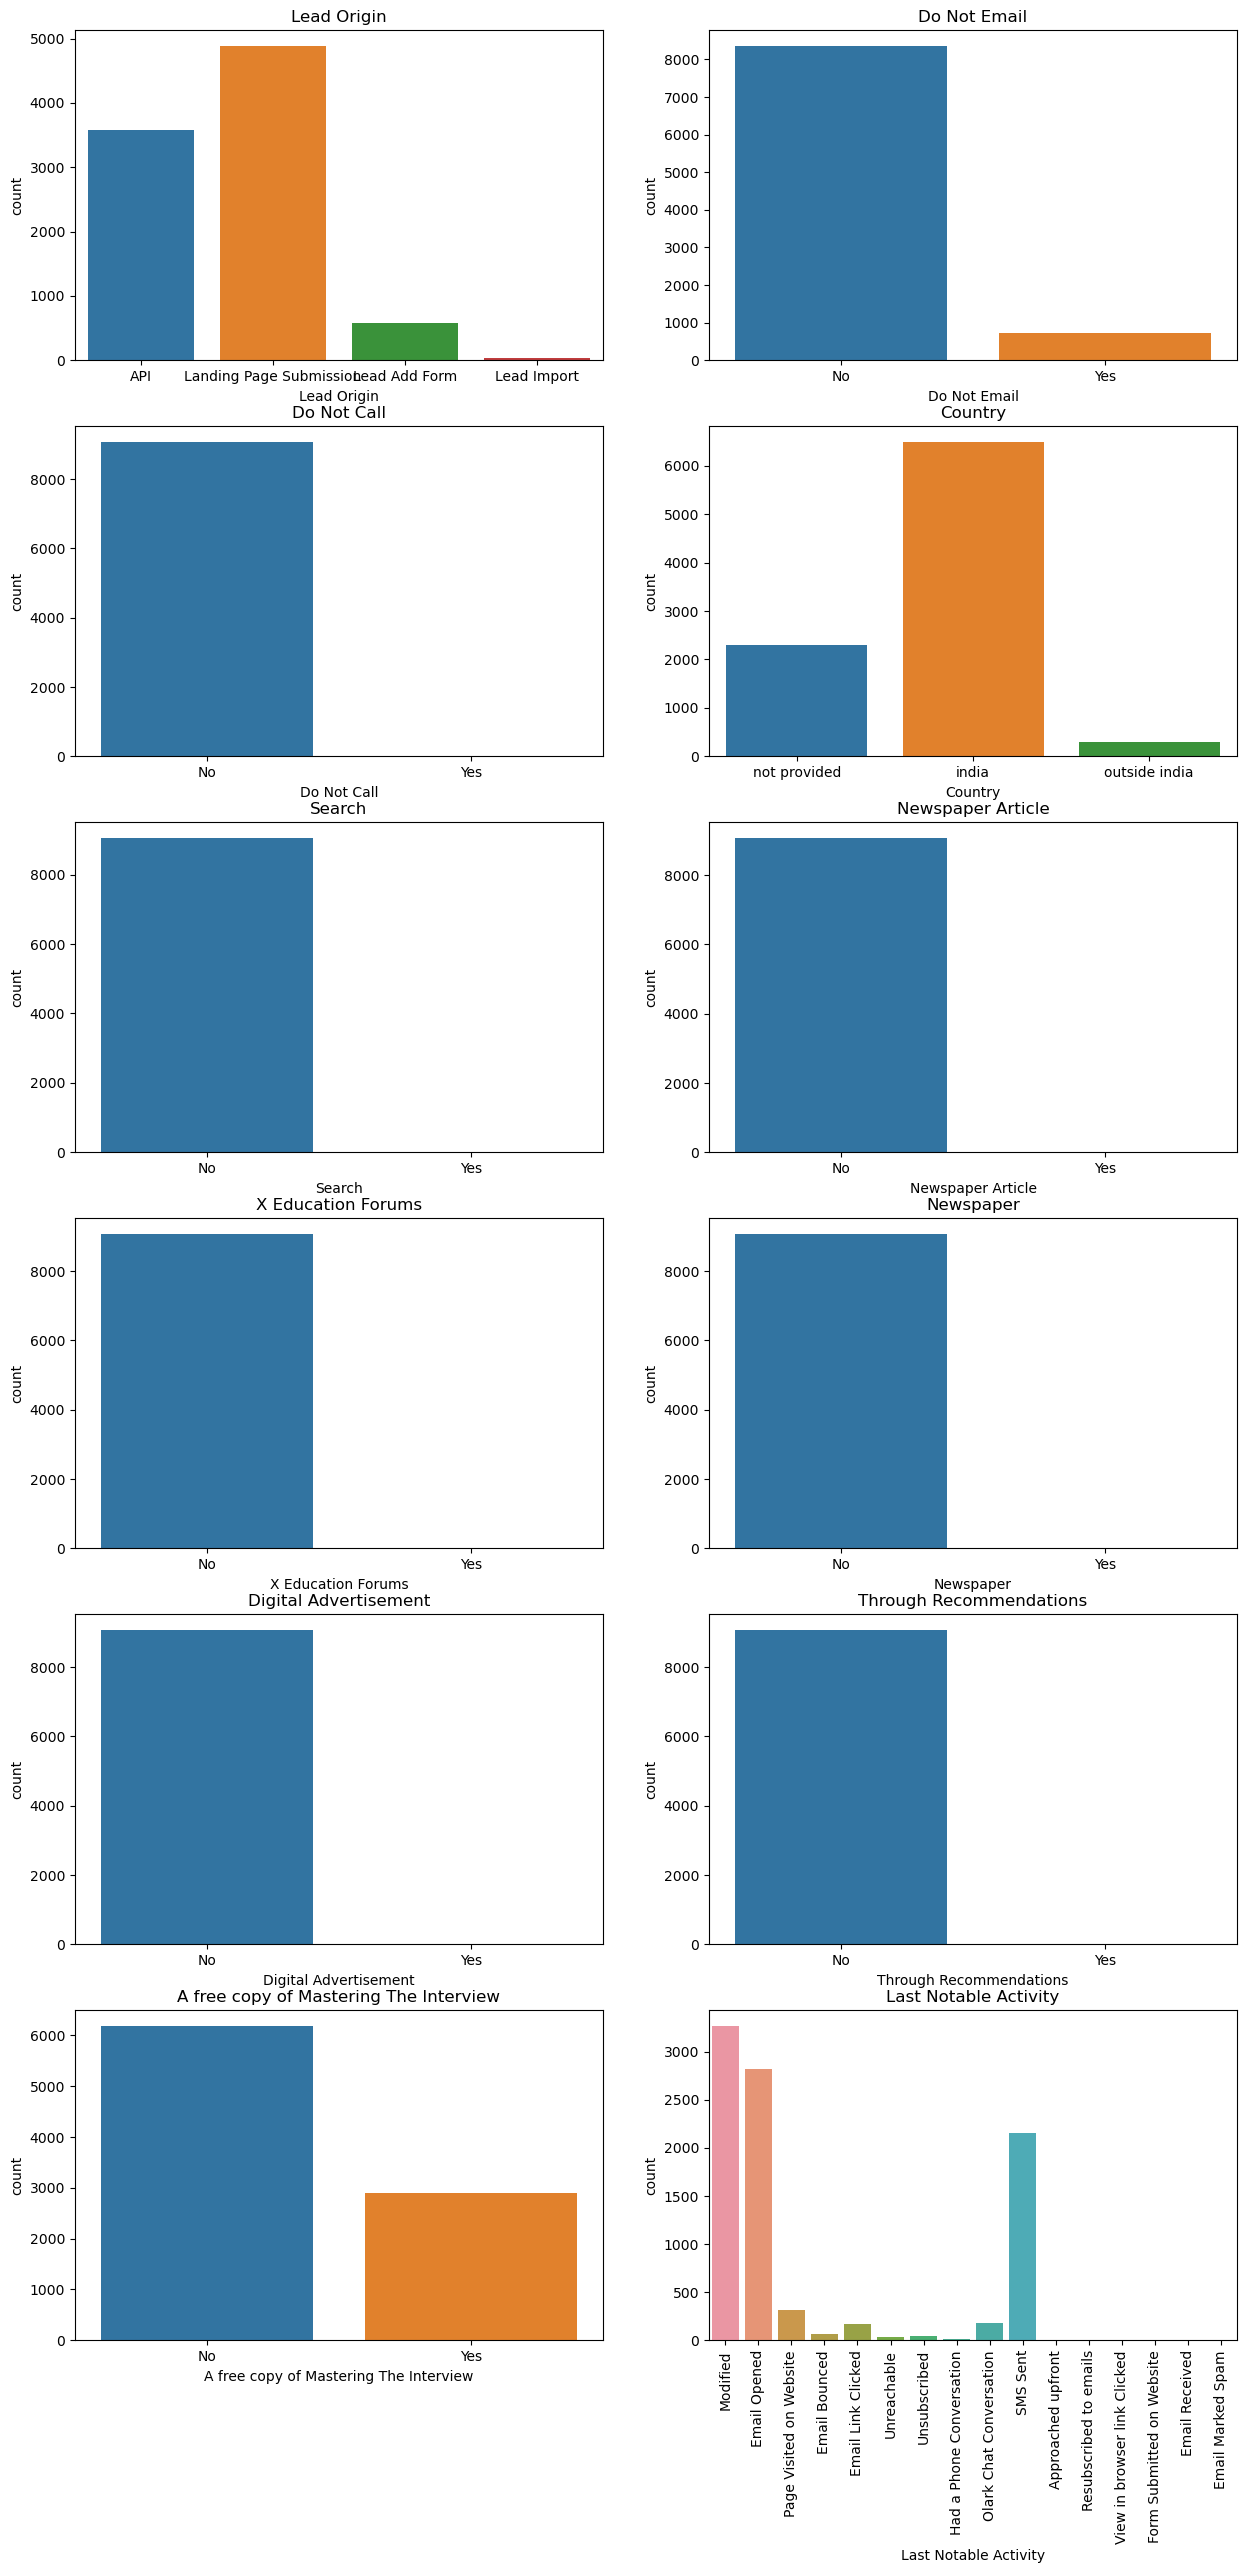

In [33]:
plt.figure(figsize = (15,30))

plt.subplot(6,2,1)
sns.countplot(leadscore_final['Lead Origin'])
plt.title('Lead Origin')

plt.subplot(6,2,2)
sns.countplot(leadscore_final['Do Not Email'])
plt.title('Do Not Email')

plt.subplot(6,2,3)
sns.countplot(leadscore_final['Do Not Call'])
plt.title('Do Not Call')

plt.subplot(6,2,4)
sns.countplot(leadscore_final['Country'])
plt.title('Country')

plt.subplot(6,2,5)
sns.countplot(leadscore_final['Search'])
plt.title('Search')

plt.subplot(6,2,6)
sns.countplot(leadscore_final['Newspaper Article'])
plt.title('Newspaper Article')

plt.subplot(6,2,7)
sns.countplot(leadscore_final['X Education Forums'])
plt.title('X Education Forums')

plt.subplot(6,2,8)
sns.countplot(leadscore_final['Newspaper'])
plt.title('Newspaper')

plt.subplot(6,2,9)
sns.countplot(leadscore_final['Digital Advertisement'])
plt.title('Digital Advertisement')

plt.subplot(6,2,10)
sns.countplot(leadscore_final['Through Recommendations'])
plt.title('Through Recommendations')

plt.subplot(6,2,11)
sns.countplot(leadscore_final['A free copy of Mastering The Interview'])
plt.title('A free copy of Mastering The Interview')

plt.subplot(6,2,12)
sns.countplot(leadscore_final['Last Notable Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')


plt.show()

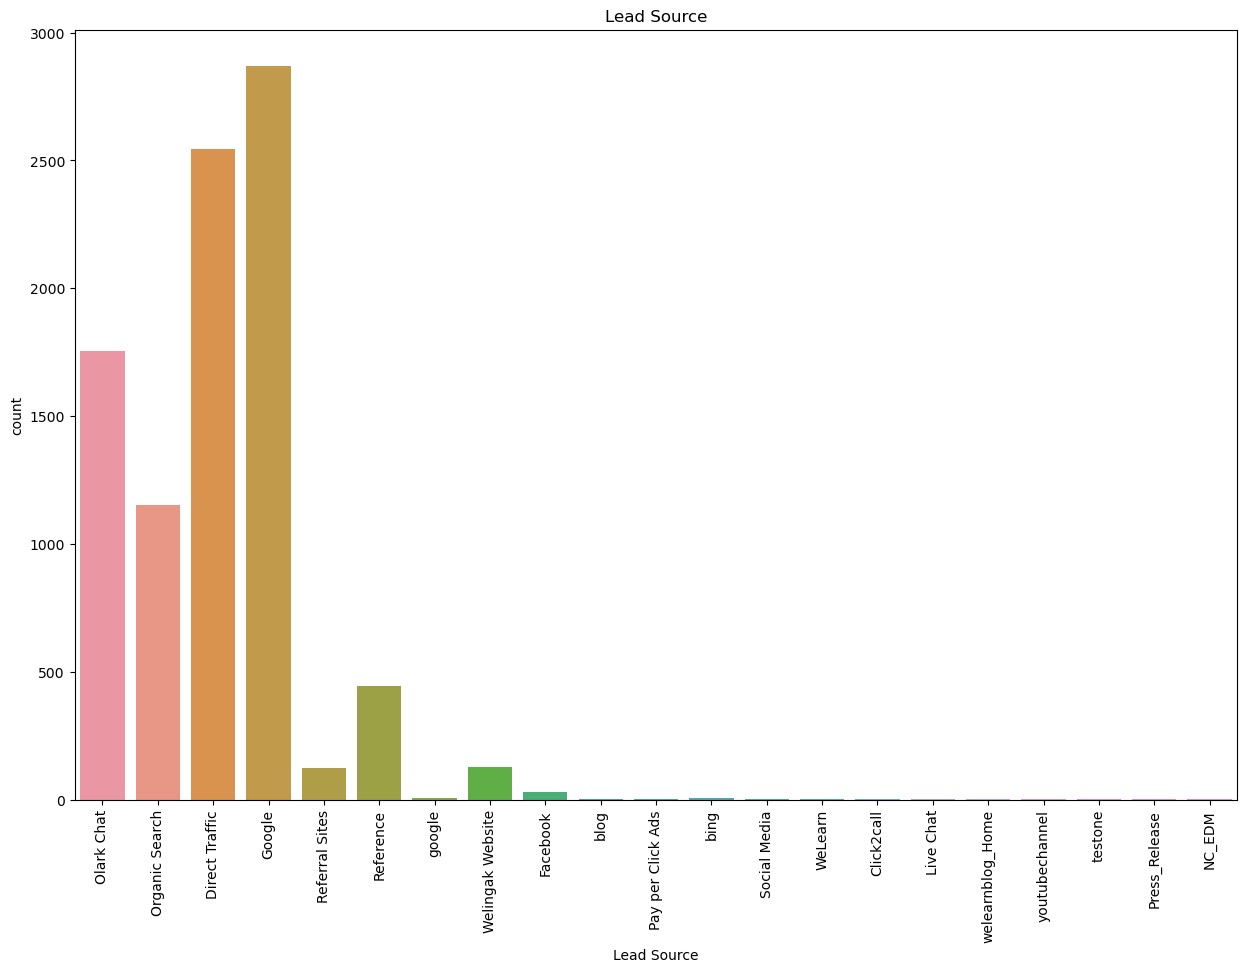

In [34]:
plt.figure(figsize = (15,10))
sns.countplot(leadscore_final['Lead Source']).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

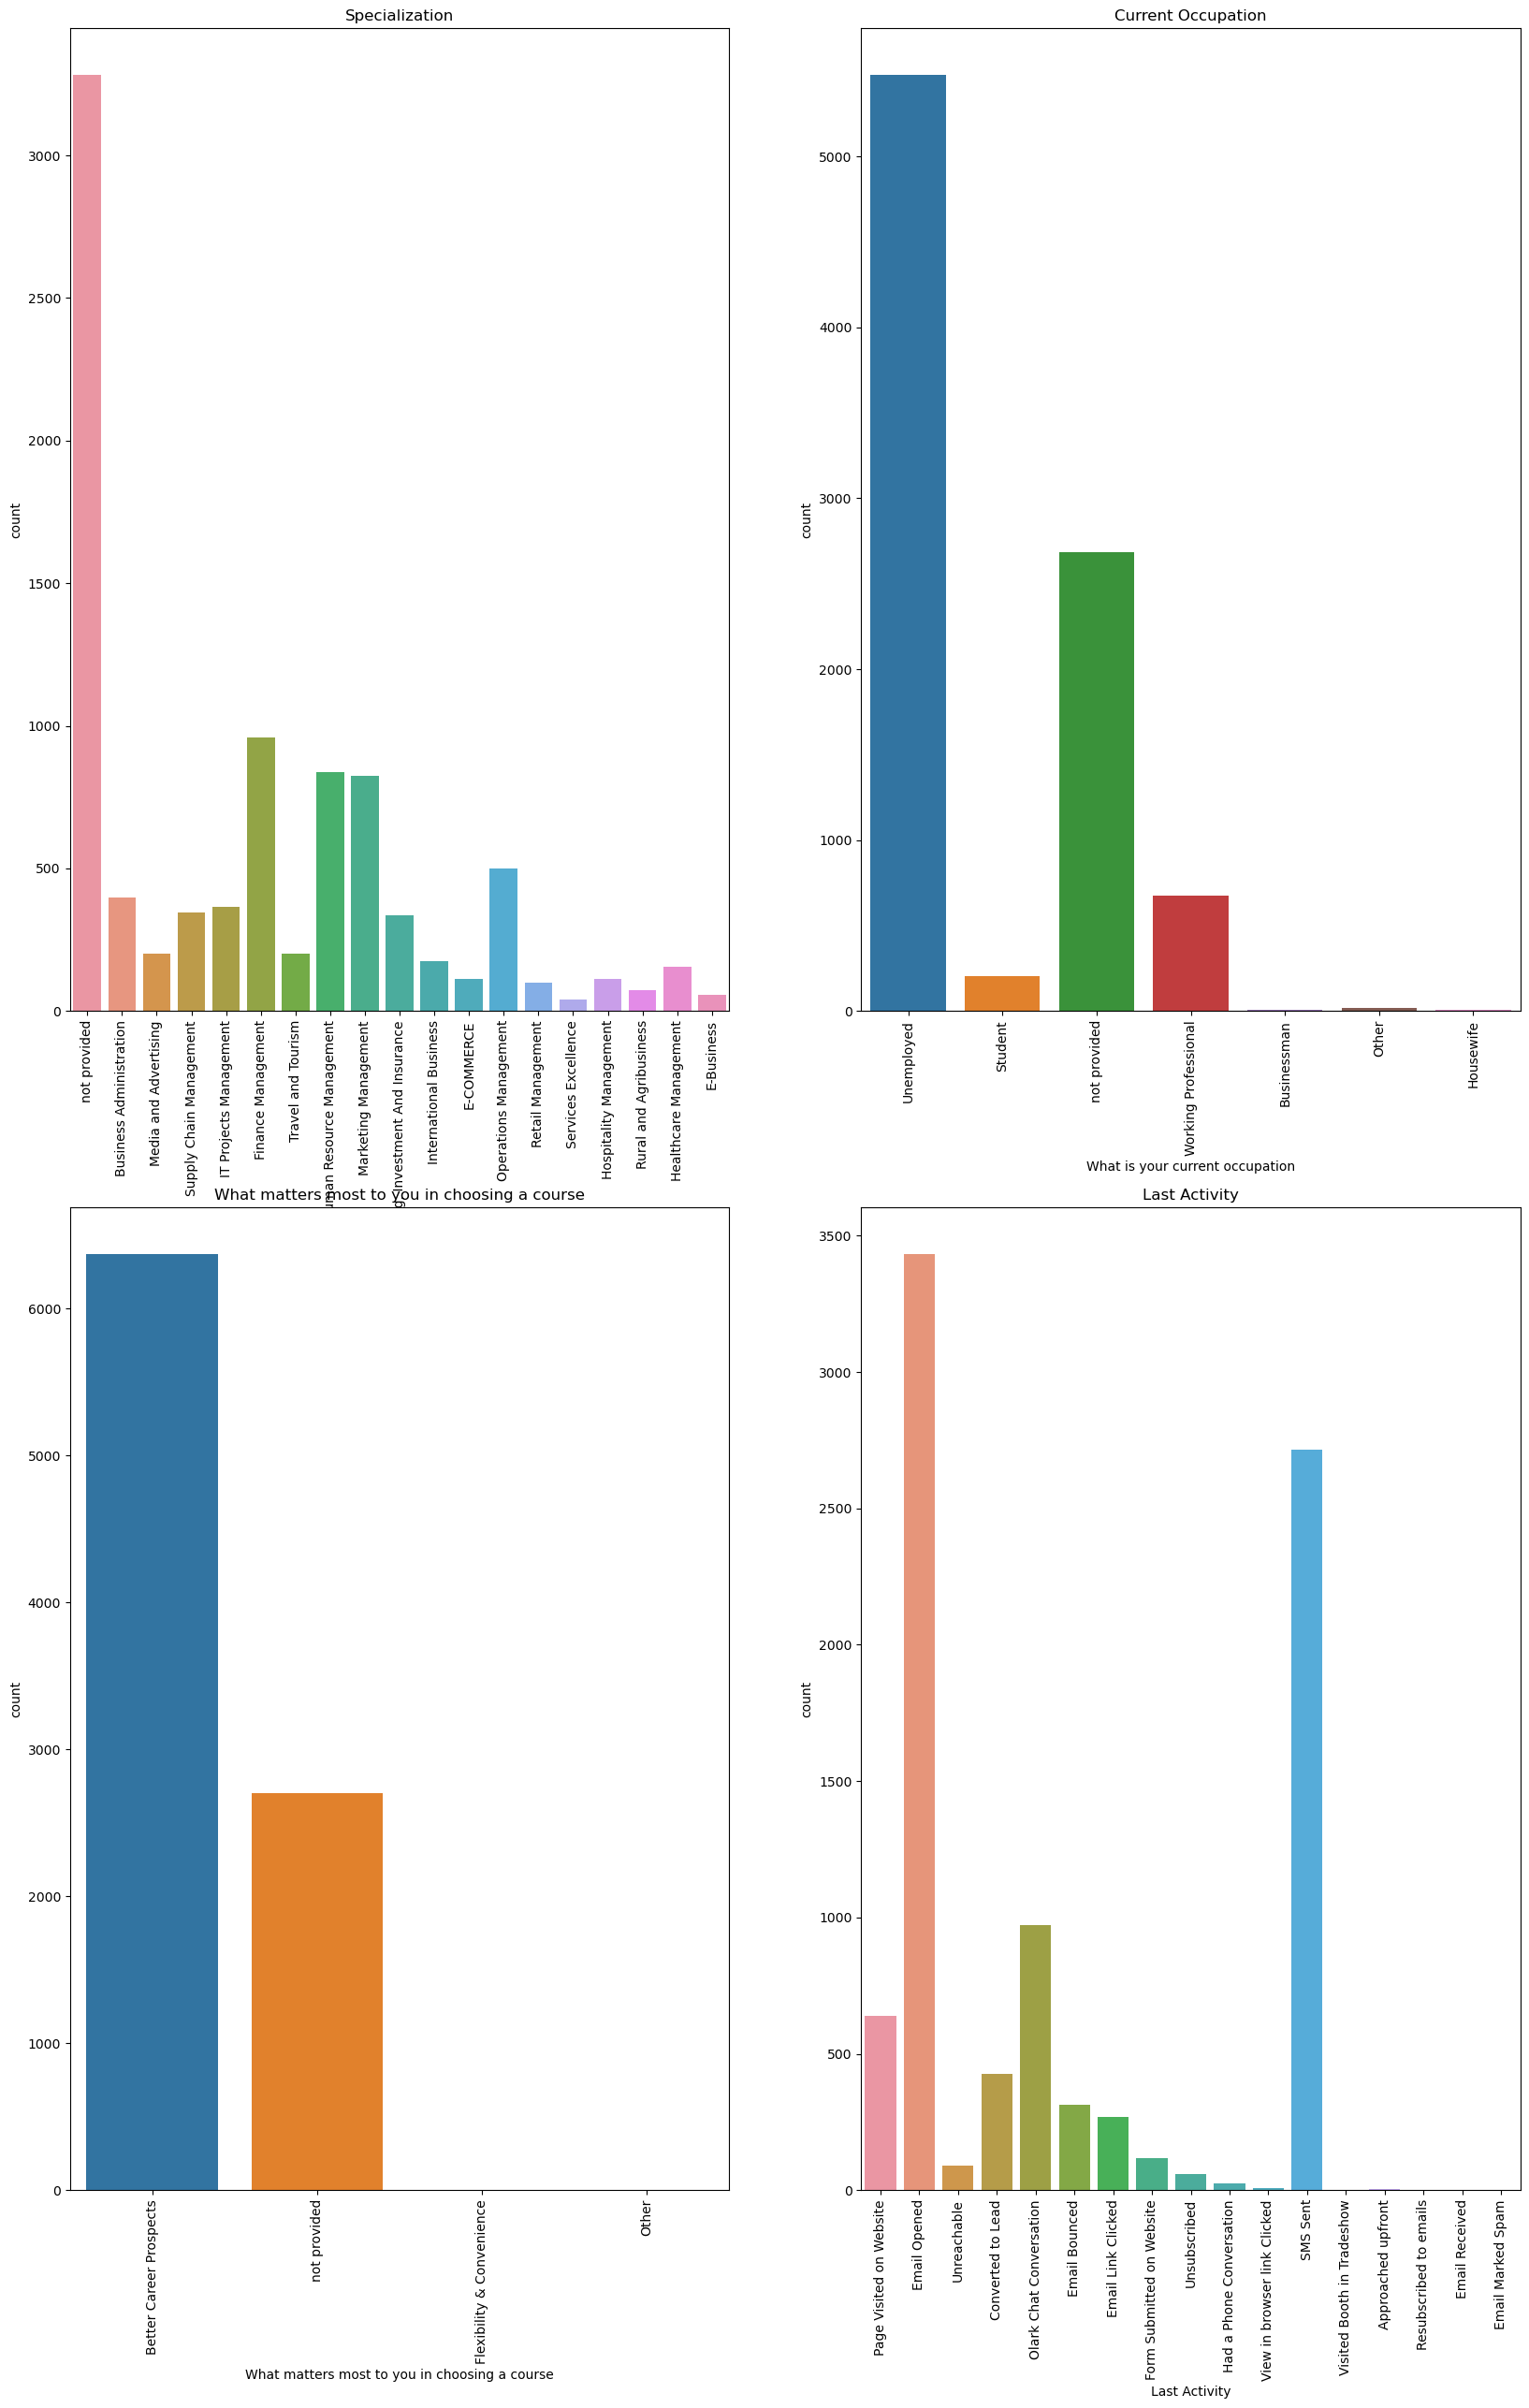

In [35]:
plt.figure(figsize = (20,30))
plt.subplot(2,2,1)
sns.countplot(leadscore_final['Specialization']).tick_params(axis='x', rotation = 90)
plt.title('Specialization')
plt.subplot(2,2,2)
sns.countplot(leadscore_final['What is your current occupation']).tick_params(axis='x', rotation = 90)
plt.title('Current Occupation')
plt.subplot(2,2,3)
sns.countplot(leadscore_final['What matters most to you in choosing a course']).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')
plt.subplot(2,2,4)
sns.countplot(leadscore_final['Last Activity']).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')
plt.show()

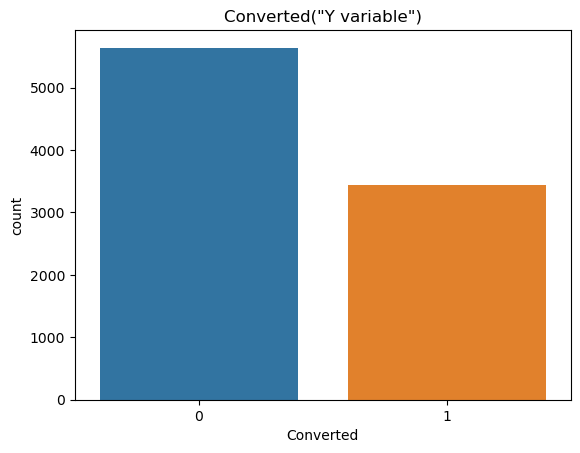

In [36]:
sns.countplot(leadscore_final['Converted'])
plt.title('Converted("Y variable")')
plt.show()

**Continuous Variable**

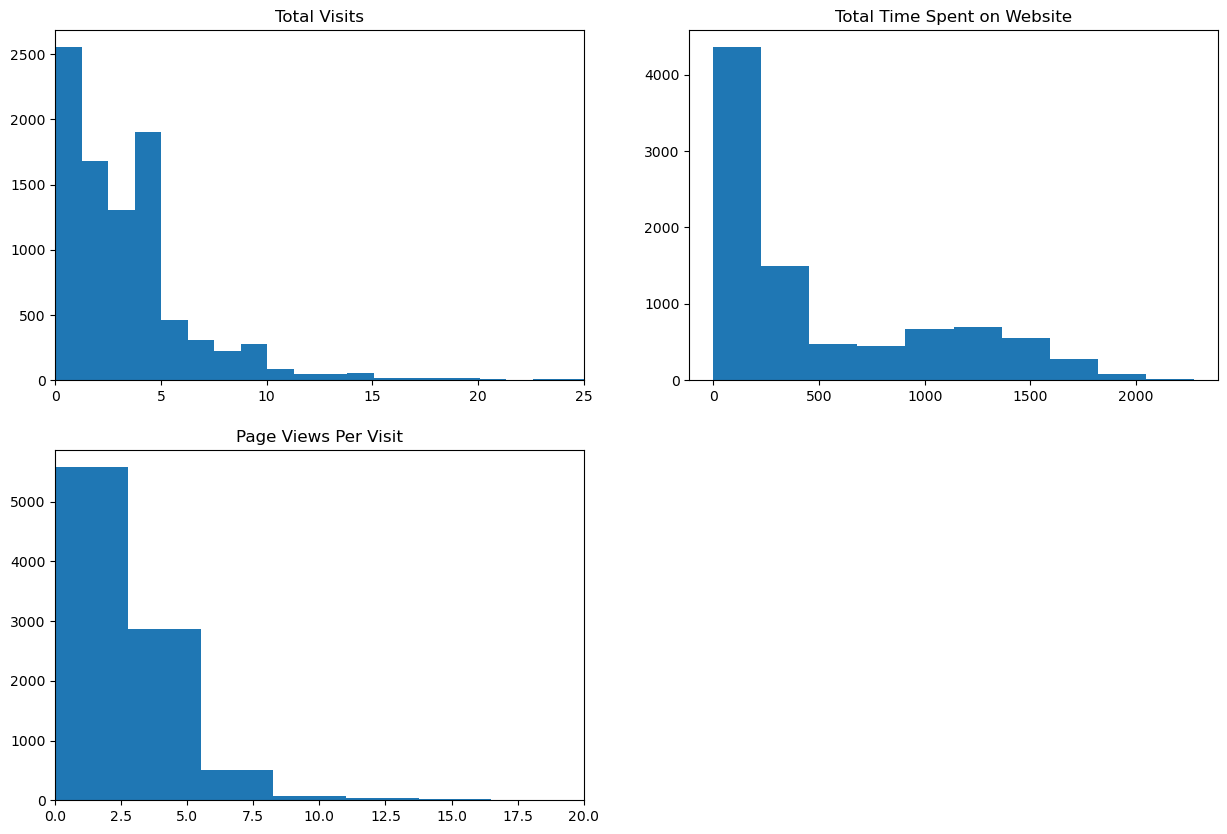

In [37]:
plt.figure(figsize = (15,10))
plt.subplot(221)
plt.hist(leadscore_final['TotalVisits'], bins = 200)
plt.title('Total Visits')
plt.xlim(0,25)

plt.subplot(222)
plt.hist(leadscore_final['Total Time Spent on Website'], bins = 10)
plt.title('Total Time Spent on Website')

plt.subplot(223)
plt.hist(leadscore_final['Page Views Per Visit'], bins = 20)
plt.title('Page Views Per Visit')
plt.xlim(0,20)
plt.show()

In [38]:
leadscore_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9074 entries, 0 to 9239
Data columns (total 21 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Lead Origin                                    9074 non-null   object 
 1   Lead Source                                    9074 non-null   object 
 2   Do Not Email                                   9074 non-null   object 
 3   Do Not Call                                    9074 non-null   object 
 4   Converted                                      9074 non-null   int64  
 5   TotalVisits                                    9074 non-null   float64
 6   Total Time Spent on Website                    9074 non-null   int64  
 7   Page Views Per Visit                           9074 non-null   float64
 8   Last Activity                                  9074 non-null   object 
 9   Country                                        9074 

# Bivariate Analysis

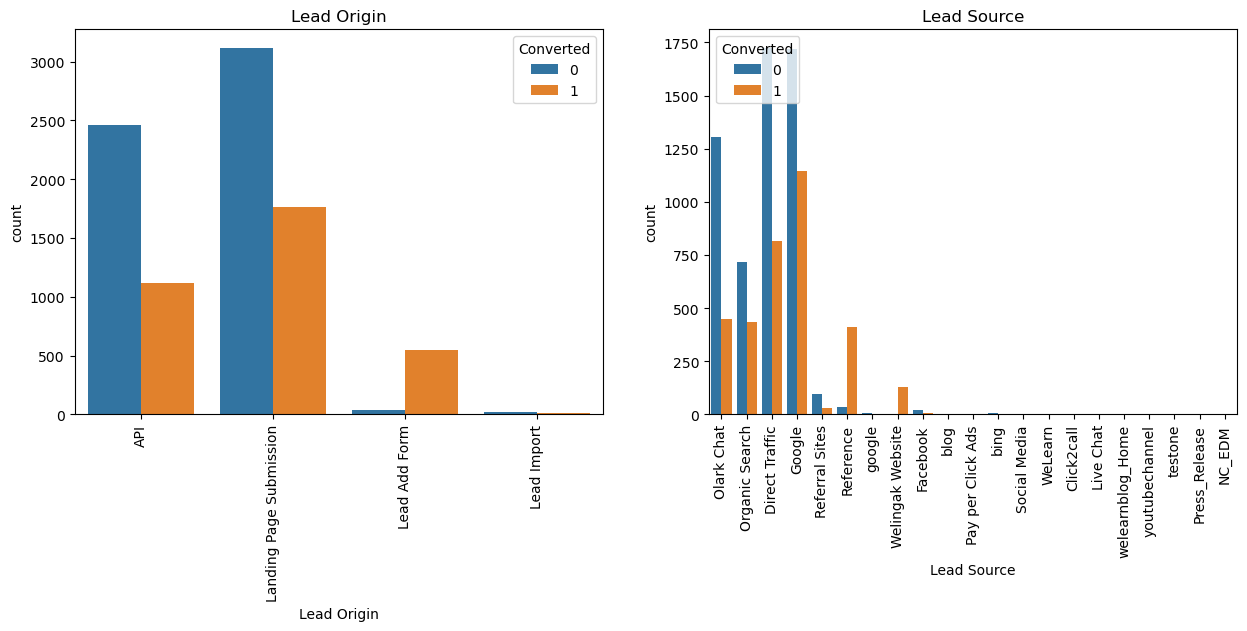

In [39]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Lead Origin', hue='Converted', data= leadscore_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Origin')

plt.subplot(1,2,2)
sns.countplot(x='Lead Source', hue='Converted', data= leadscore_final).tick_params(axis='x', rotation = 90)
plt.title('Lead Source')
plt.show()

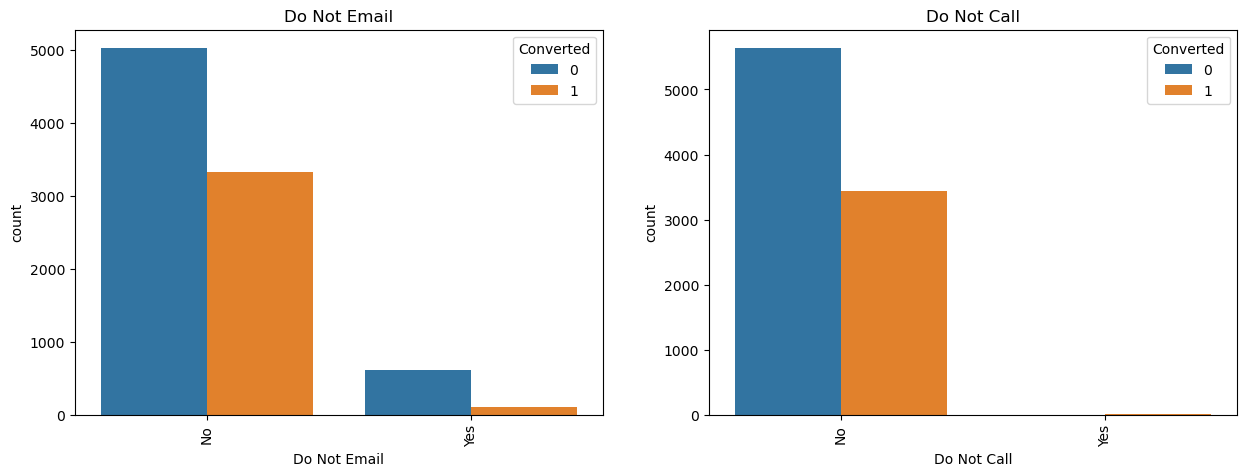

In [40]:

plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Do Not Email', hue='Converted', data= leadscore_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Email')

plt.subplot(1,2,2)
sns.countplot(x='Do Not Call', hue='Converted', data= leadscore_final).tick_params(axis='x', rotation = 90)
plt.title('Do Not Call')
plt.show()

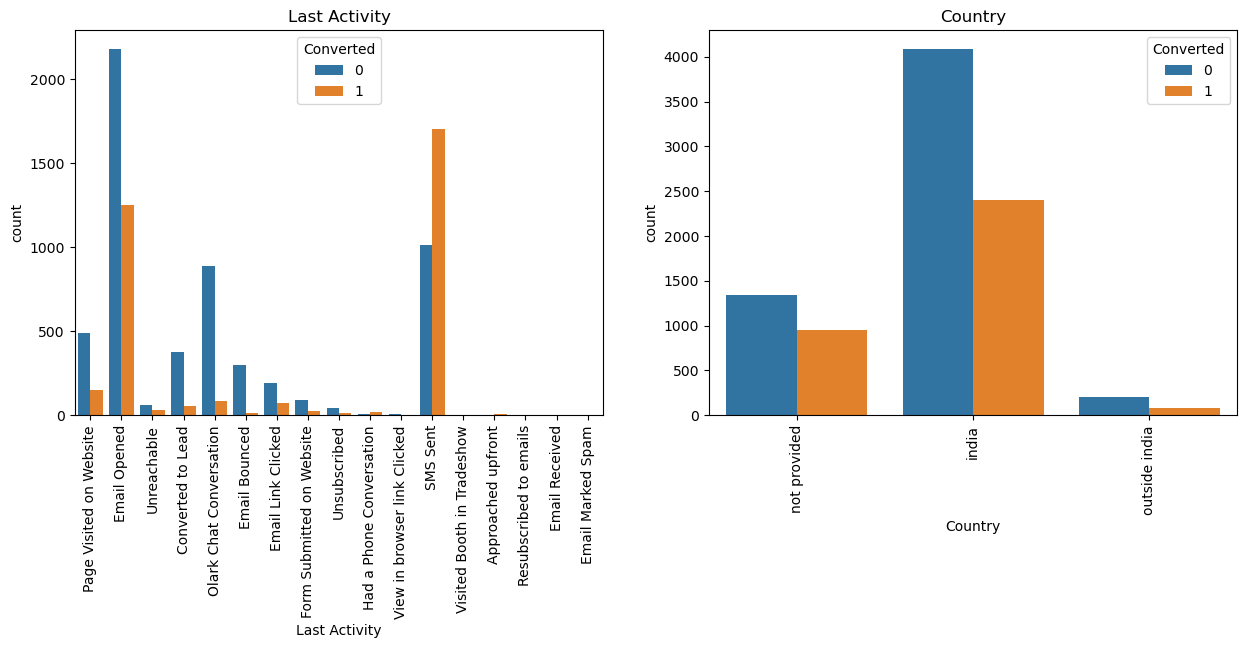

In [41]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Last Activity', hue='Converted', data= leadscore_final).tick_params(axis='x', rotation = 90)
plt.title('Last Activity')

plt.subplot(1,2,2)
sns.countplot(x='Country', hue='Converted', data= leadscore_final).tick_params(axis='x', rotation = 90)
plt.title('Country')
plt.show()

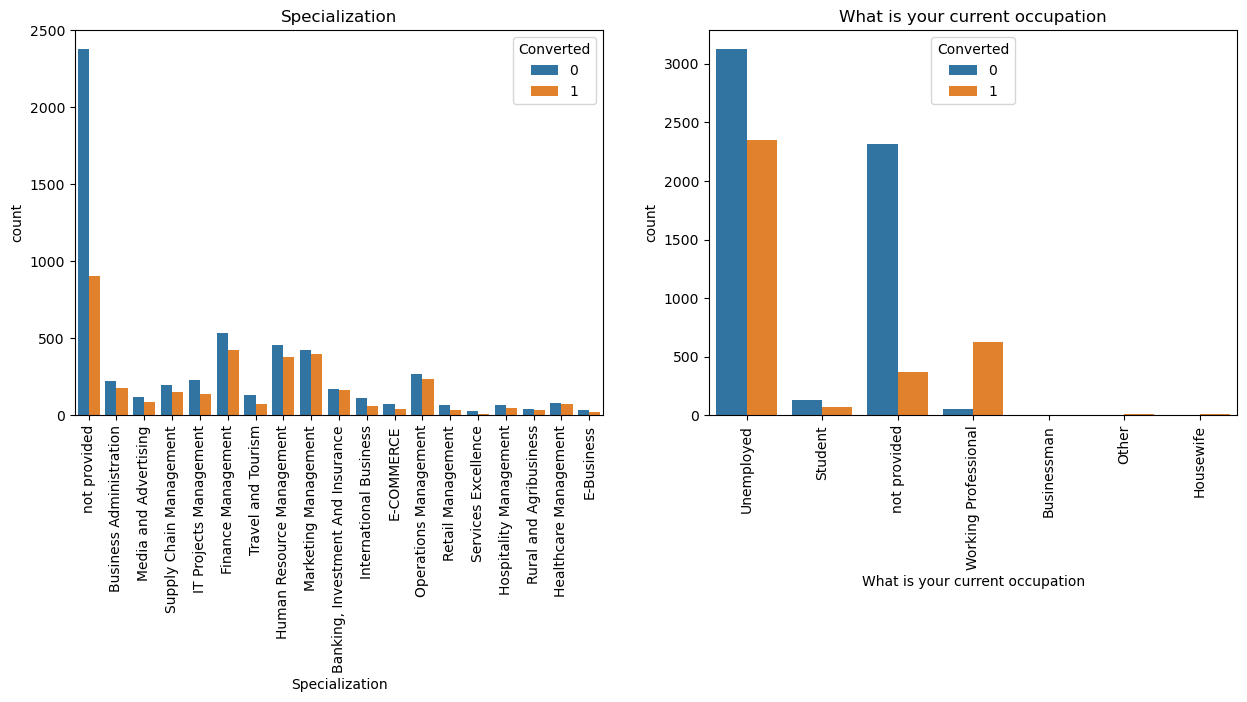

In [42]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Specialization', hue='Converted', data= leadscore_final).tick_params(axis='x', rotation = 90)
plt.title('Specialization')

plt.subplot(1,2,2)
sns.countplot(x='What is your current occupation', hue='Converted', data= leadscore_final).tick_params(axis='x', rotation = 90)
plt.title('What is your current occupation')
plt.show()

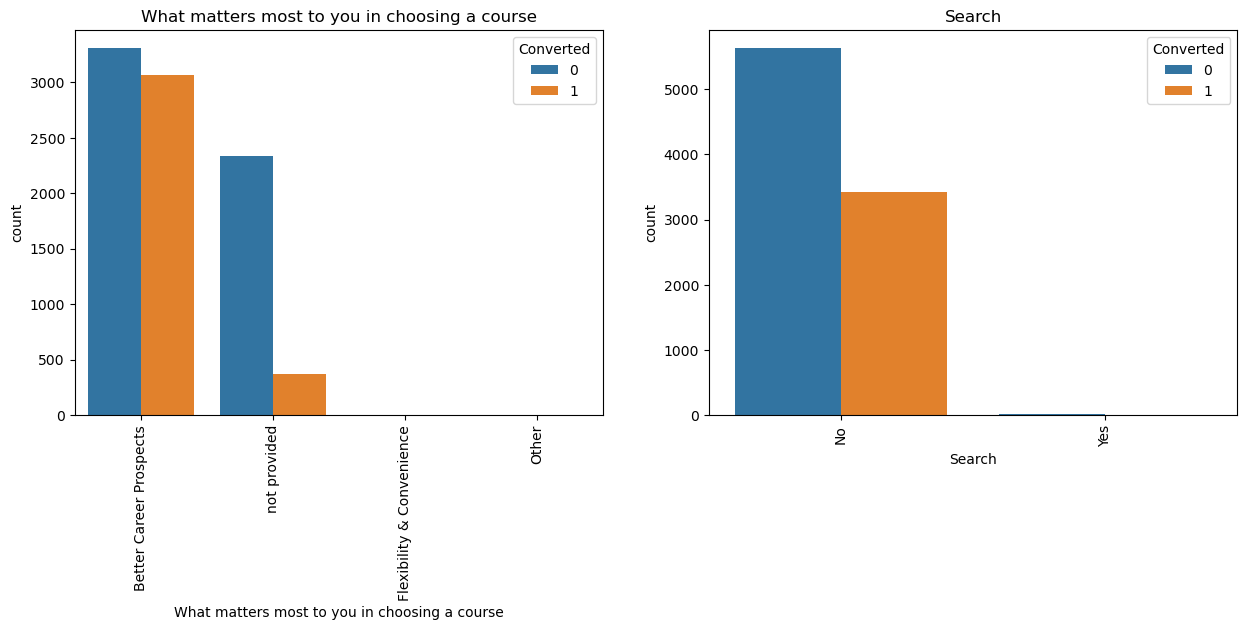

In [43]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='What matters most to you in choosing a course', hue='Converted', data= leadscore_final).tick_params(axis='x', rotation = 90)
plt.title('What matters most to you in choosing a course')

plt.subplot(1,2,2)
sns.countplot(x='Search', hue='Converted', data= leadscore_final).tick_params(axis='x', rotation = 90)
plt.title('Search')
plt.show()

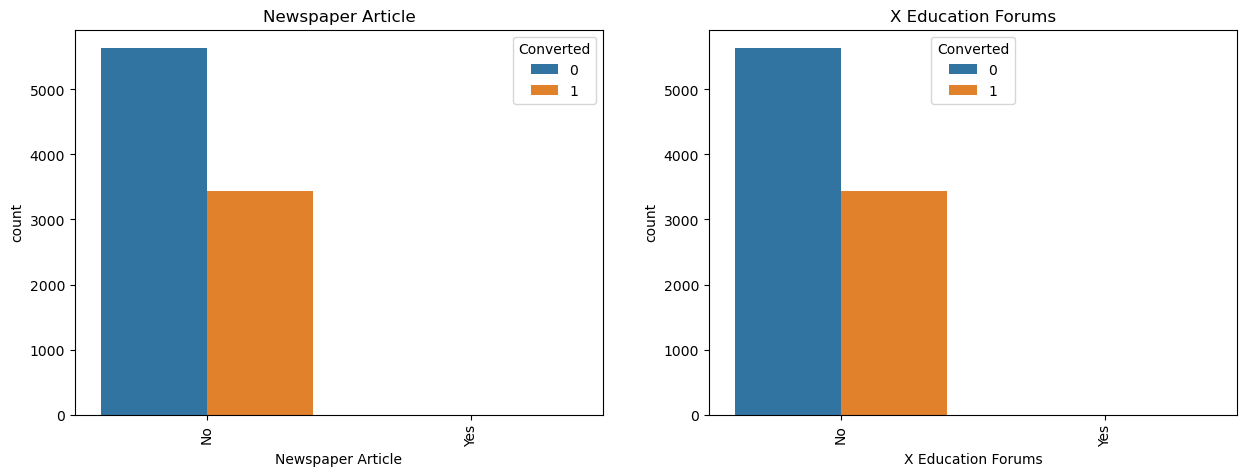

In [44]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper Article', hue='Converted', data= leadscore_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper Article')

plt.subplot(1,2,2)
sns.countplot(x='X Education Forums', hue='Converted', data= leadscore_final).tick_params(axis='x', rotation = 90)
plt.title('X Education Forums')
plt.show()

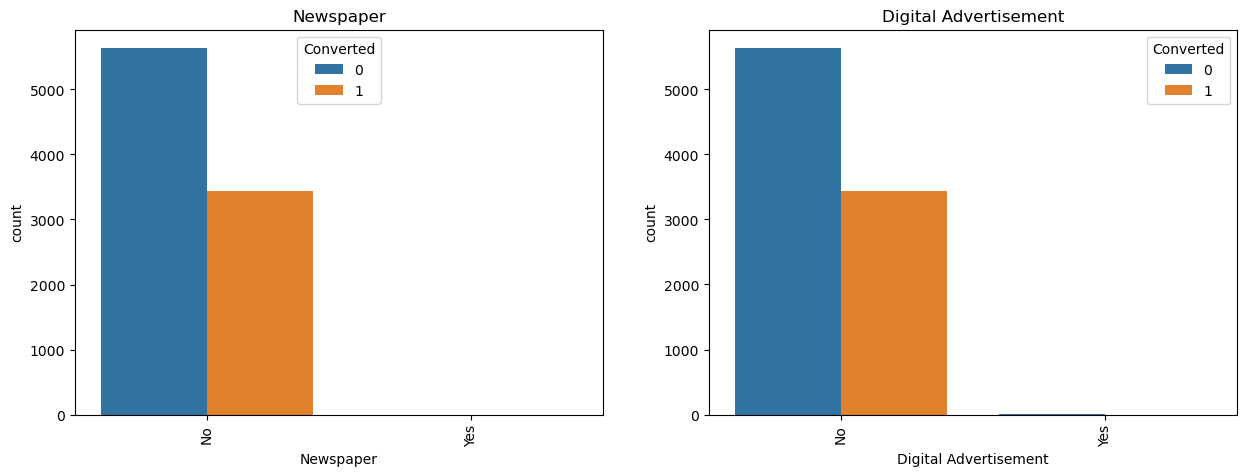

In [45]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Newspaper', hue='Converted', data= leadscore_final).tick_params(axis='x', rotation = 90)
plt.title('Newspaper')

plt.subplot(1,2,2)
sns.countplot(x='Digital Advertisement', hue='Converted', data= leadscore_final).tick_params(axis='x', rotation = 90)
plt.title('Digital Advertisement')
plt.show()

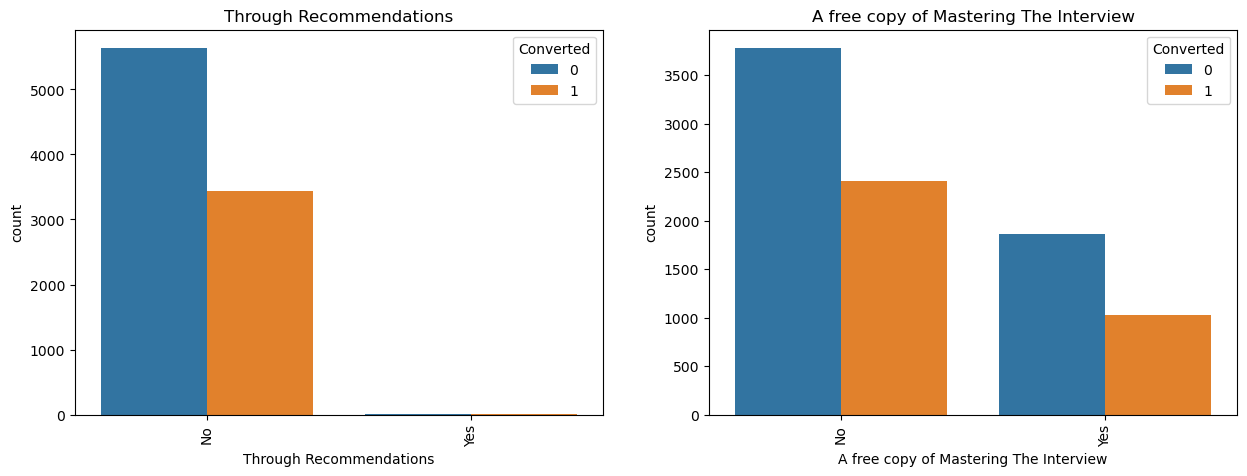

In [46]:
plt.figure(figsize = (15,5))

plt.subplot(1,2,1)
sns.countplot(x='Through Recommendations', hue='Converted', data= leadscore_final).tick_params(axis='x', rotation = 90)
plt.title('Through Recommendations')

plt.subplot(1,2,2)
sns.countplot(x='A free copy of Mastering The Interview', hue='Converted', data= leadscore_final).tick_params(axis='x', rotation = 90)
plt.title('A free copy of Mastering The Interview')
plt.show()

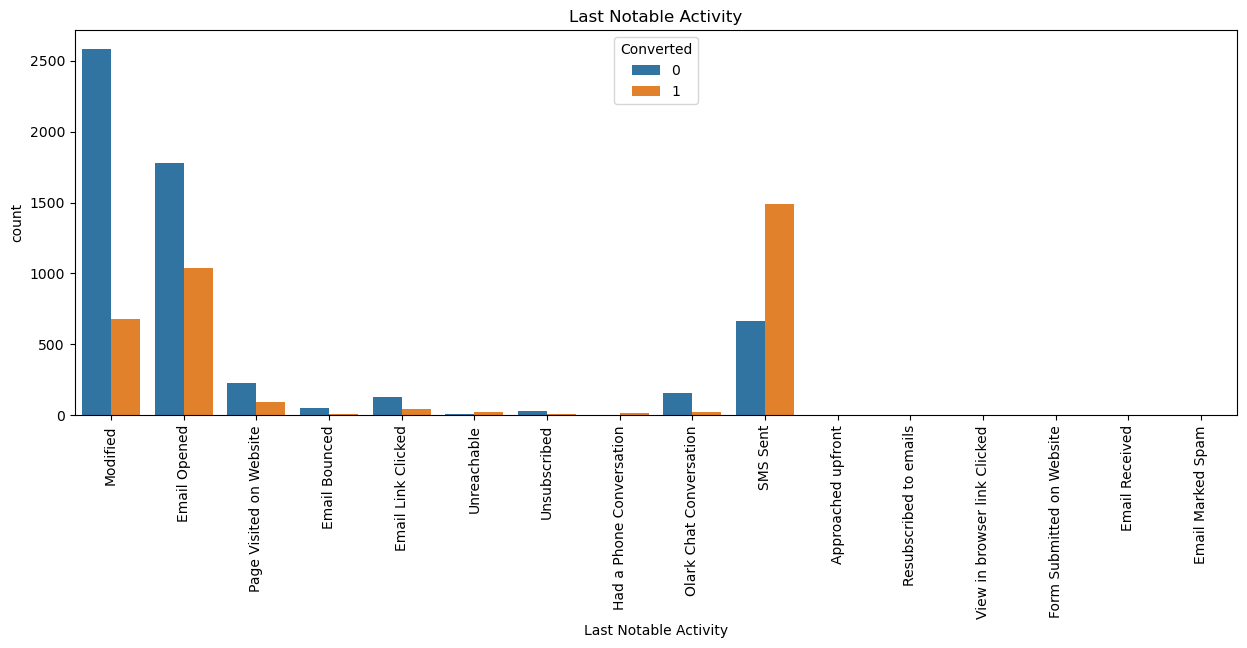

In [47]:
plt.figure(figsize = (15,5))
sns.countplot(x='Last Notable Activity', hue='Converted', data= leadscore_final).tick_params(axis='x', rotation = 90)
plt.title('Last Notable Activity')
plt.show()

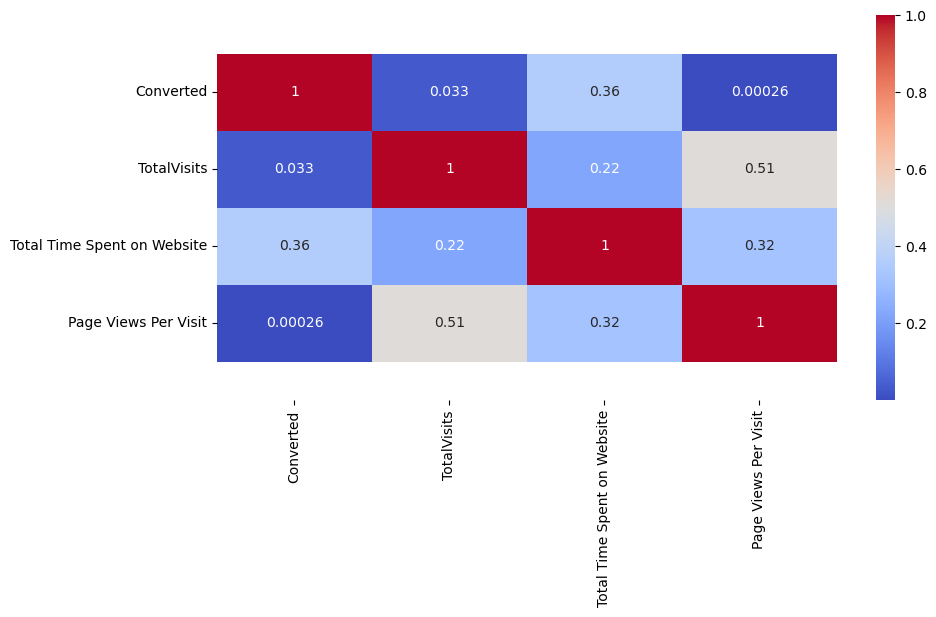

In [48]:
# To check the correlation among varibles
plt.figure(figsize=(10,5))
ax=sns.heatmap(leadscore_final.corr(),annot = True , cmap="coolwarm")
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

### Outliers Analysis and Handling

In [49]:
numeric = leadscore_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
max,251.000000,2272.000000,55.000000


Text(0.5, 1.0, 'Page Views Per Visit')

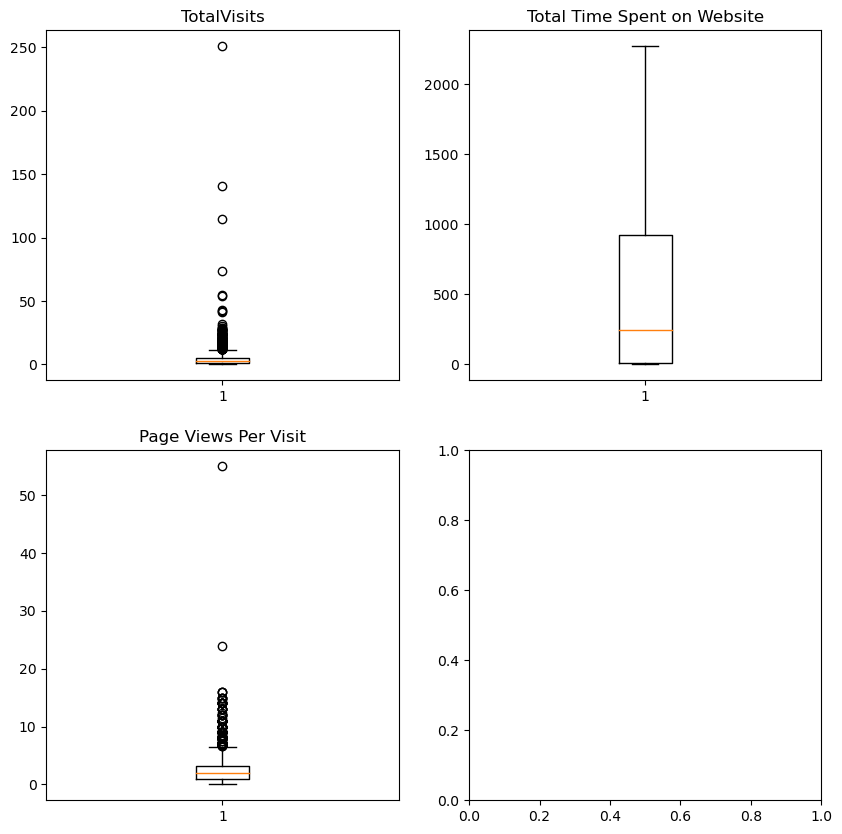

In [50]:
fig, axs = plt.subplots(2, 2,figsize=(10,10))


axs[0, 0].boxplot(leadscore_final.TotalVisits)
axs[0, 0].set_title('TotalVisits')
axs[0, 1].boxplot(leadscore_final["Total Time Spent on Website"])
axs[0, 1].set_title('Total Time Spent on Website')
axs[1, 0].boxplot(leadscore_final["Page Views Per Visit"])
axs[1, 0].set_title('Page Views Per Visit')

In [51]:
column_list=['TotalVisits','Total Time Spent on Website','Page Views Per Visit']
for column in column_list: 
    Q1=leadscore_final[column].quantile(0.01)
    Q3=leadscore_final[column].quantile(0.99)
    IQR=Q3-Q1
    leads_final=leadscore_final[(leadscore_final[column]>=Q1) & (leadscore_final[column]<=Q3)]

In [52]:
numeric = leadscore_final[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']]
numeric.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.000000,9074.000000,9074.000000
mean,3.456028,482.887481,2.370151
std,4.858802,545.256560,2.160871
min,0.000000,0.000000,0.000000
25%,1.000000,11.000000,1.000000
50%,3.000000,246.000000,2.000000
75%,5.000000,922.750000,3.200000
max,251.000000,2272.000000,55.000000


# Data Preparation

### Create dummy variables out of categrical variables

In [53]:
leadscore_final.shape

(9074, 21)

In [54]:
leadscore_final.loc[:, leadscore_final.dtypes == 'object'].columns

Index(['Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call',
       'Last Activity', 'Country', 'Specialization',
       'What is your current occupation',
       'What matters most to you in choosing a course', 'Search',
       'Newspaper Article', 'X Education Forums', 'Newspaper',
       'Digital Advertisement', 'Through Recommendations',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [55]:
# Create dummy variables using the 'get_dummies'
dummy = pd.get_dummies(leadscore_final[['Lead Origin','Specialization' ,'Lead Source', 'Do Not Email', 'Last Activity', 'What is your current occupation','A free copy of Mastering The Interview', 'Last Notable Activity']], drop_first=True)
# Add the results to the master dataframe
leadscore_final_dum = pd.concat([leadscore_final, dummy], axis=1)
leadscore_final_dum.head()

,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,API,Olark Chat,No,No,0,0.0,0,0.0,Page Visited on Website,not provided,...,0,0,1,0,0,0,0,0,0,0
1,API,Organic Search,No,No,0,5.0,674,2.5,Email Opened,india,...,0,0,0,0,0,0,0,0,0,0
2,Landing Page Submission,Direct Traffic,No,No,1,2.0,1532,2.0,Email Opened,india,...,0,0,0,0,0,0,0,0,0,0
3,Landing Page Submission,Direct Traffic,No,No,0,1.0,305,1.0,Unreachable,india,...,0,0,1,0,0,0,0,0,0,0
4,Landing Page Submission,Google,No,No,1,2.0,1428,1.0,Converted to Lead,india,...,0,0,1,0,0,0,0,0,0,0


In [56]:
leadscore_final_dum = leadscore_final_dum.drop(['What is your current occupation_not provided','Lead Origin', 'Lead Source', 'Do Not Email', 'Do Not Call','Last Activity', 'Country', 'Specialization', 'Specialization_not provided','What is your current occupation','What matters most to you in choosing a course', 'Search','Newspaper Article', 'X Education Forums', 'Newspaper','Digital Advertisement', 'Through Recommendations','A free copy of Mastering The Interview', 'Last Notable Activity'], 1)
leadscore_final_dum.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0,0.0,0,0.0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,0,5.0,674,2.5,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,2.0,1532,2.0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1.0,305,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,1,2.0,1428,1.0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


# Test-Train Split

In [57]:
X = leadscore_final_dum.drop(['Converted'], 1)
X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
0,0.0,0,0.0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
1,5.0,674,2.5,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2.0,1532,2.0,1,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1.0,305,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,2.0,1428,1.0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [58]:
# Putting the target variable in y
y = leadscore_final_dum['Converted']
y.head()

0    0
1    0
2    1
3    0
4    1
Name: Converted, dtype: int64

In [59]:
# Split the dataset into 70% and 30% for train and test respectively
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=10)

# Feature Scaling

In [60]:
X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.fit_transform(X_train[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])
X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Specialization_Business Administration,Specialization_E-Business,Specialization_E-COMMERCE,Specialization_Finance Management,...,Last Notable Activity_Form Submitted on Website,Last Notable Activity_Had a Phone Conversation,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_SMS Sent,Last Notable Activity_Unreachable,Last Notable Activity_Unsubscribed,Last Notable Activity_View in browser link Clicked
1289,0.014184,0.612676,0.083333,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3604,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
5584,0.042553,0.751761,0.250000,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7679,0.000000,0.000000,0.000000,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7563,0.014184,0.787852,0.083333,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Checking for correlations

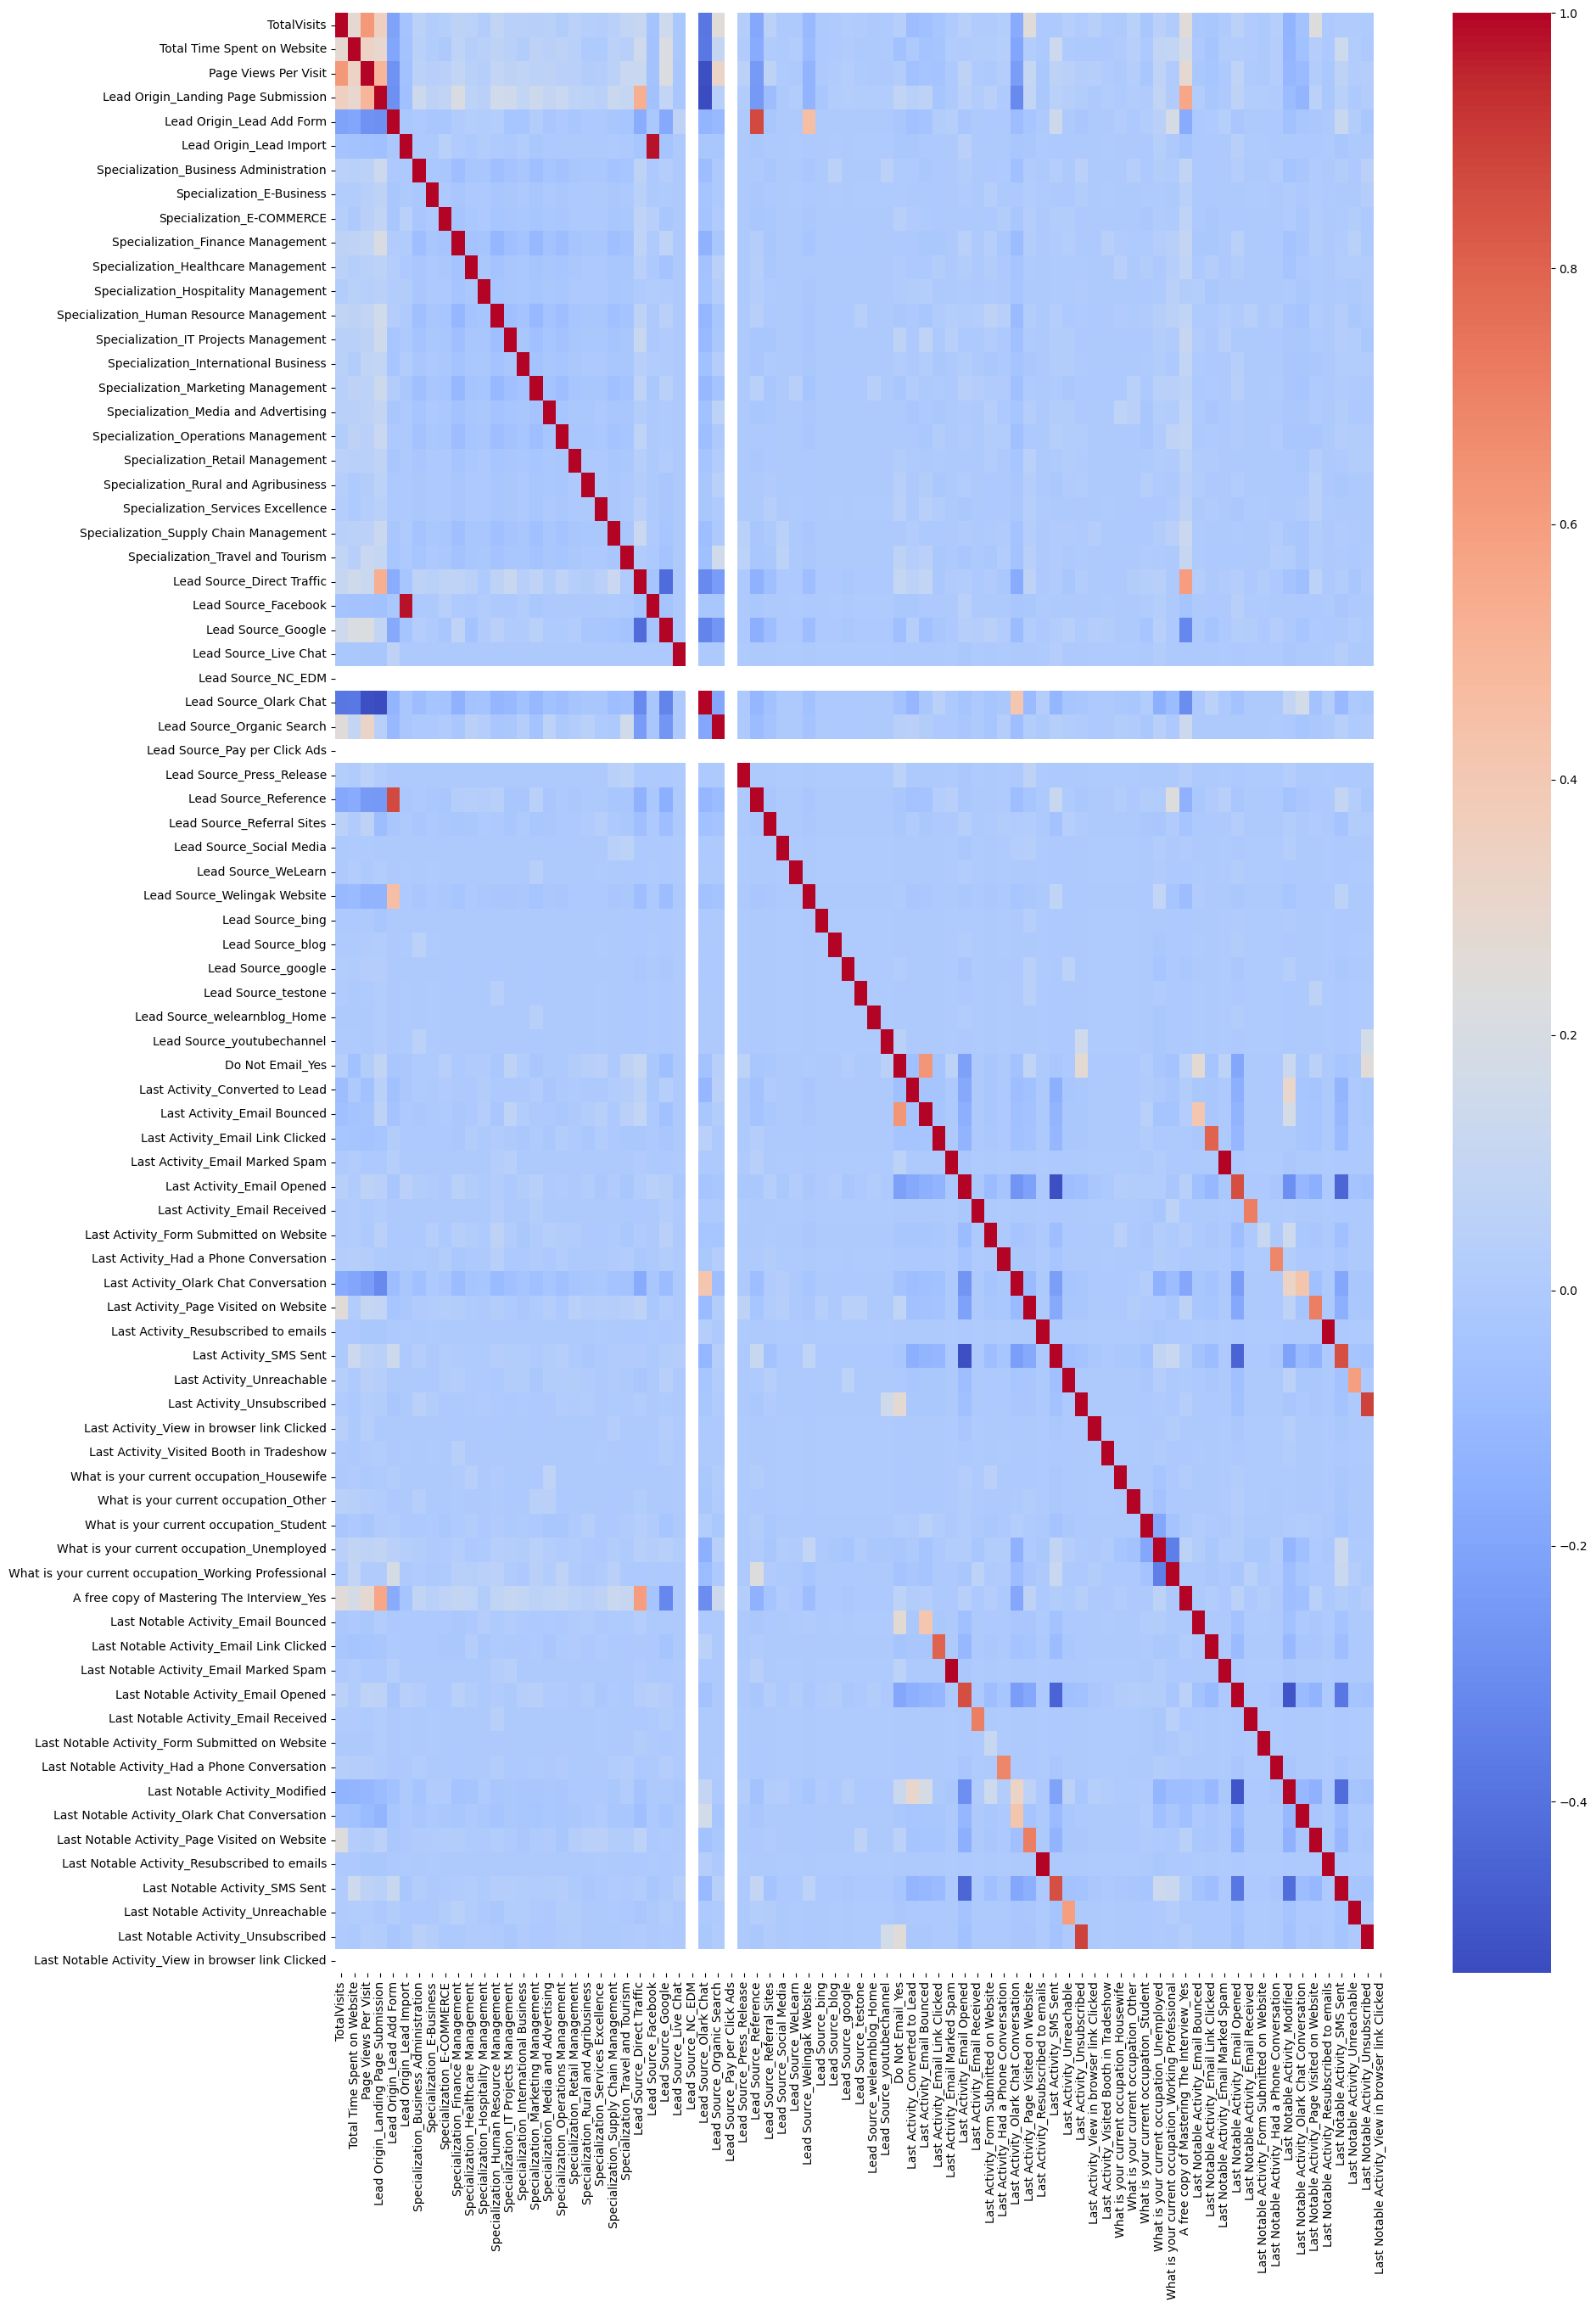

In [61]:
# To check the correlation among varibles
plt.figure(figsize=(20,30))
sns.heatmap(X_train.corr() , cmap = "coolwarm" )
bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.show()

We will be using RFE to select variable Since there are a lot of variables and it is difficult to drop them.

# Model Building

In [62]:
# Running RFE with 15 variables as output
rfe = RFE(logreg)
rfe = rfe.fit(X_train, y_train)

In [63]:
# Features that have been selected by RFE
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', True, 1),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', True, 1),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 17),
 ('Specialization_Business Administration', False, 8),
 ('Specialization_E-Business', False, 7),
 ('Specialization_E-COMMERCE', True, 1),
 ('Specialization_Finance Management', False, 5),
 ('Specialization_Healthcare Management', True, 1),
 ('Specialization_Hospitality Management', False, 20),
 ('Specialization_Human Resource Management', False, 6),
 ('Specialization_IT Projects Management', False, 3),
 ('Specialization_International Business', False, 13),
 ('Specialization_Marketing Management', True, 1),
 ('Specialization_Media and Advertising', False, 19),
 ('Specialization_Operations Management', False, 2),
 ('Specialization_Retail Management', False, 39),
 ('Specialization_Rural and Agribusiness', True, 1),
 ('Specialization_Services Excellence',

In [64]:
# Put all the columns selected by RFE in the variable 'col'
col = X_train.columns[rfe.support_]
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Specialization_E-COMMERCE', 'Specialization_Healthcare Management',
       'Specialization_Marketing Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable',
       'What is your current occupa

In [65]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [66]:
X_train_sm = sm.add_constant(X_train)
logm1 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res = logm1.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6311
Model Family:                Binomial   Df Model:                           39
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2550.5
Date:                Sun, 18 Jun 2023   Deviance:                       5101.0
Time:                        03:11:59   Pearson chi2:                 6.51e+03
No. Iterations:                    22   Pseudo R-squ. (CS):             0.4122
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.5123      0.470     -3.219      0.001      -2.433      -0.592
TotalVisits                                              8.8235      1.993      4.427      0.000       4.917      12.730
Total Time Spent on Website                              4.6604      0.172     27.168      0.000       4.324       4.997
Page Views Per Visit                                    -2.2331      0.624     -3.581      0.000      -3.455      -1.011
Lead Origin_Landing Page Submission                     -0.2415      0.105     -2.290      0.022      -0.448      -0.035
Lead Origin_Lead Add Form                                0.9485      1.195      0.794      0.427      -1.393       3.290
Specialization_E-COMMERCE                                0.4120      0.312      1.321      0.186      -0.199       1.023
Specialization_Healthcare Management                     0.2157      0.264      0.817      0.414      -0.302       0.733
Specialization_Marketing Management                      0.3528      0.121      2.909      0.004       0.115       0.590
Specialization_Rural and Agribusiness                    0.3686      0.412      0.895      0.371      -0.438       1.176
Specialization_Services Excellence                       0.5005      0.547      0.915      0.360      -0.572       1.573
Lead Source_Direct Traffic                              -0.7214      0.437     -1.651      0.099      -1.578       0.135
Lead Source_Google                                      -0.4150      0.432     -0.960      0.337      -1.262       0.432
Lead Source_Olark Chat                                   0.6706      0.432      1.552      0.121      -0.176       1.517
Lead Source_Organic Search                              -0.5285      0.441     -1.198      0.231      -1.393       0.336
Lead Source_Reference                                    1.8986      1.196      1.587      0.113      -0.446       4.243
Lead Source_Referral Sites                              -0.4349      0.531     -0.819      0.413      -1.476       0.607
Lead Source_Social Media                                 1.6165      1.531      1.056      0.291      -1.385       4.618
Lead Source_Welingak Website                             4.5467      1.552      2.929      0.003       1.505       7.589
Do Not Email_Yes                                        -1.2770      0.208     -6.146      0.000      -1.684      -0.870
Last Activity_Converted to Lead                         -0.7098      0.223     -3.176      0.001      -1.148      -0.272
Last Activity_Email Bounced                             -0.9729      0.403     -2.413      0.016      -1.763      -0.183
Last Activity_Had a Phone Conversation                   0

In [67]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
38,Last Notable Activity_Resubscribed to emails,inf
24,Last Activity_Resubscribed to emails,inf
4,Lead Origin_Lead Add Form,83.00
14,Lead Source_Reference,64.55
17,Lead Source_Welingak Website,19.14
10,Lead Source_Direct Traffic,10.77
11,Lead Source_Google,10.74
33,Last Notable Activity_Email Opened,7.90
25,Last Activity_SMS Sent,6.14
12,Lead Source_Olark Chat,5.84


In [68]:
col = col.drop('What is your current occupation_Housewife', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Specialization_E-COMMERCE', 'Specialization_Healthcare Management',
       'Specialization_Marketing Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'What is your current occupation_Ot

In [69]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [70]:
X_train_sm = sm.add_constant(X_train)
logm2 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res1 = logm2.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6312
Model Family:                Binomial   Df Model:                           38
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2558.2
Date:                Sun, 18 Jun 2023   Deviance:                       5116.4
Time:                        03:12:00   Pearson chi2:                 6.52e+03
No. Iterations:                    21   Pseudo R-squ. (CS):             0.4107
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4814      0.469     -3.157      0.002      -2.401      -0.562
TotalVisits                                              8.7565      1.989      4.402      0.000       4.858      12.655
Total Time Spent on Website                              4.6542      0.171     27.180      0.000       4.319       4.990
Page Views Per Visit                                    -2.2787      0.623     -3.658      0.000      -3.500      -1.058
Lead Origin_Landing Page Submission                     -0.2325      0.105     -2.210      0.027      -0.439      -0.026
Lead Origin_Lead Add Form                                0.9575      1.194      0.802      0.423      -1.383       3.298
Specialization_E-COMMERCE                                0.4079      0.311      1.310      0.190      -0.203       1.018
Specialization_Healthcare Management                     0.2614      0.262      0.997      0.319      -0.252       0.775
Specialization_Marketing Management                      0.3494      0.121      2.884      0.004       0.112       0.587
Specialization_Rural and Agribusiness                    0.3595      0.411      0.874      0.382      -0.447       1.166
Specialization_Services Excellence                       0.4969      0.546      0.909      0.363      -0.574       1.568
Lead Source_Direct Traffic                              -0.7176      0.436     -1.644      0.100      -1.573       0.138
Lead Source_Google                                      -0.4087      0.432     -0.946      0.344      -1.255       0.438
Lead Source_Olark Chat                                   0.6672      0.432      1.546      0.122      -0.179       1.513
Lead Source_Organic Search                              -0.5098      0.441     -1.156      0.247      -1.374       0.354
Lead Source_Reference                                    1.9100      1.196      1.597      0.110      -0.434       4.254
Lead Source_Referral Sites                              -0.4292      0.531     -0.808      0.419      -1.470       0.611
Lead Source_Social Media                                 1.6246      1.531      1.061      0.288      -1.375       4.625
Lead Source_Welingak Website                             4.5421      1.552      2.927      0.003       1.501       7.584
Do Not Email_Yes                                        -1.2815      0.208     -6.169      0.000      -1.689      -0.874
Last Activity_Converted to Lead                         -0.7279      0.223     -3.262      0.001      -1.165      -0.291
Last Activity_Email Bounced                             -0.9849      0.403     -2.445      0.014      -1.775      -0.195
Last Activity_Had a Phone Conversation                   0

In [71]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
24,Last Activity_Resubscribed to emails,inf
37,Last Notable Activity_Resubscribed to emails,inf
4,Lead Origin_Lead Add Form,83.00
14,Lead Source_Reference,64.55
17,Lead Source_Welingak Website,19.14
10,Lead Source_Direct Traffic,10.76
11,Lead Source_Google,10.73
32,Last Notable Activity_Email Opened,7.90
25,Last Activity_SMS Sent,6.13
12,Lead Source_Olark Chat,5.84


In [72]:
col = col.drop('Last Notable Activity_Had a Phone Conversation', 1)
col

Index(['TotalVisits', 'Total Time Spent on Website', 'Page Views Per Visit',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Specialization_E-COMMERCE', 'Specialization_Healthcare Management',
       'Specialization_Marketing Management',
       'Specialization_Rural and Agribusiness',
       'Specialization_Services Excellence', 'Lead Source_Direct Traffic',
       'Lead Source_Google', 'Lead Source_Olark Chat',
       'Lead Source_Organic Search', 'Lead Source_Reference',
       'Lead Source_Referral Sites', 'Lead Source_Social Media',
       'Lead Source_Welingak Website', 'Do Not Email_Yes',
       'Last Activity_Converted to Lead', 'Last Activity_Email Bounced',
       'Last Activity_Had a Phone Conversation',
       'Last Activity_Olark Chat Conversation',
       'Last Activity_Page Visited on Website',
       'Last Activity_Resubscribed to emails', 'Last Activity_SMS Sent',
       'Last Activity_Unreachable', 'What is your current occupation_Ot

In [73]:
# Selecting columns selected by RFE
X_train = X_train[col]

In [74]:
X_train_sm = sm.add_constant(X_train)
logm3 = sm.GLM(y_train, X_train_sm, family = sm.families.Binomial())
res2 = logm3.fit()
res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6313
Model Family:                Binomial   Df Model:                           37
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2560.1
Date:                Sun, 18 Jun 2023   Deviance:                       5120.3
Time:                        03:12:01   Pearson chi2:                 6.52e+03
No. Iterations:                    19   Pseudo R-squ. (CS):             0.4104
Covariance Type:            nonrobust                                         
========================================================================================================================
                                                           coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------------------
const                                                   -1.4557      0.469     -3.105      0.002      -2.375      -0.537
TotalVisits                                              8.7871      1.986      4.425      0.000       4.895      12.680
Total Time Spent on Website                              4.6478      0.171     27.157      0.000       4.312       4.983
Page Views Per Visit                                    -2.2625      0.622     -3.638      0.000      -3.481      -1.044
Lead Origin_Landing Page Submission                     -0.2290      0.105     -2.177      0.030      -0.435      -0.023
Lead Origin_Lead Add Form                                0.9539      1.194      0.799      0.424      -1.386       3.294
Specialization_E-COMMERCE                                0.3996      0.311      1.285      0.199      -0.210       1.009
Specialization_Healthcare Management                     0.2612      0.262      0.996      0.319      -0.253       0.775
Specialization_Marketing Management                      0.3504      0.121      2.895      0.004       0.113       0.588
Specialization_Rural and Agribusiness                    0.3610      0.411      0.878      0.380      -0.445       1.167
Specialization_Services Excellence                       0.4989      0.547      0.912      0.362      -0.573       1.570
Lead Source_Direct Traffic                              -0.7241      0.437     -1.659      0.097      -1.580       0.131
Lead Source_Google                                      -0.4098      0.432     -0.949      0.343      -1.257       0.437
Lead Source_Olark Chat                                   0.6655      0.432      1.542      0.123      -0.181       1.512
Lead Source_Organic Search                              -0.5210      0.441     -1.182      0.237      -1.385       0.343
Lead Source_Reference                                    1.9115      1.196      1.598      0.110      -0.433       4.256
Lead Source_Referral Sites                              -0.4405      0.532     -0.829      0.407      -1.482       0.601
Lead Source_Social Media                                 1.6203      1.530      1.059      0.290      -1.379       4.619
Lead Source_Welingak Website                             4.5480      1.552      2.931      0.003       1.506       7.590
Do Not Email_Yes                                        -1.2905      0.208     -6.217      0.000      -1.697      -0.884
Last Activity_Converted to Lead                         -0.7246      0.223     -3.248      0.001      -1.162      -0.287
Last Activity_Email Bounced                             -0.9842      0.403     -2.442      0.015      -1.774      -0.194
Last Activity_Had a Phone Conversation                   1

In [75]:
# Make a VIF dataframe for all the variables present
vif = pd.DataFrame()
vif['Features'] = X_train.columns
vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
36,Last Notable Activity_Resubscribed to emails,inf
24,Last Activity_Resubscribed to emails,inf
4,Lead Origin_Lead Add Form,83.00
14,Lead Source_Reference,64.55
17,Lead Source_Welingak Website,19.14
10,Lead Source_Direct Traffic,10.73
11,Lead Source_Google,10.69
32,Last Notable Activity_Email Opened,7.86
25,Last Activity_SMS Sent,6.11
12,Lead Source_Olark Chat,5.81


All the VIF and P-values are in good range. So we can fix this model and move on to creating the prediction

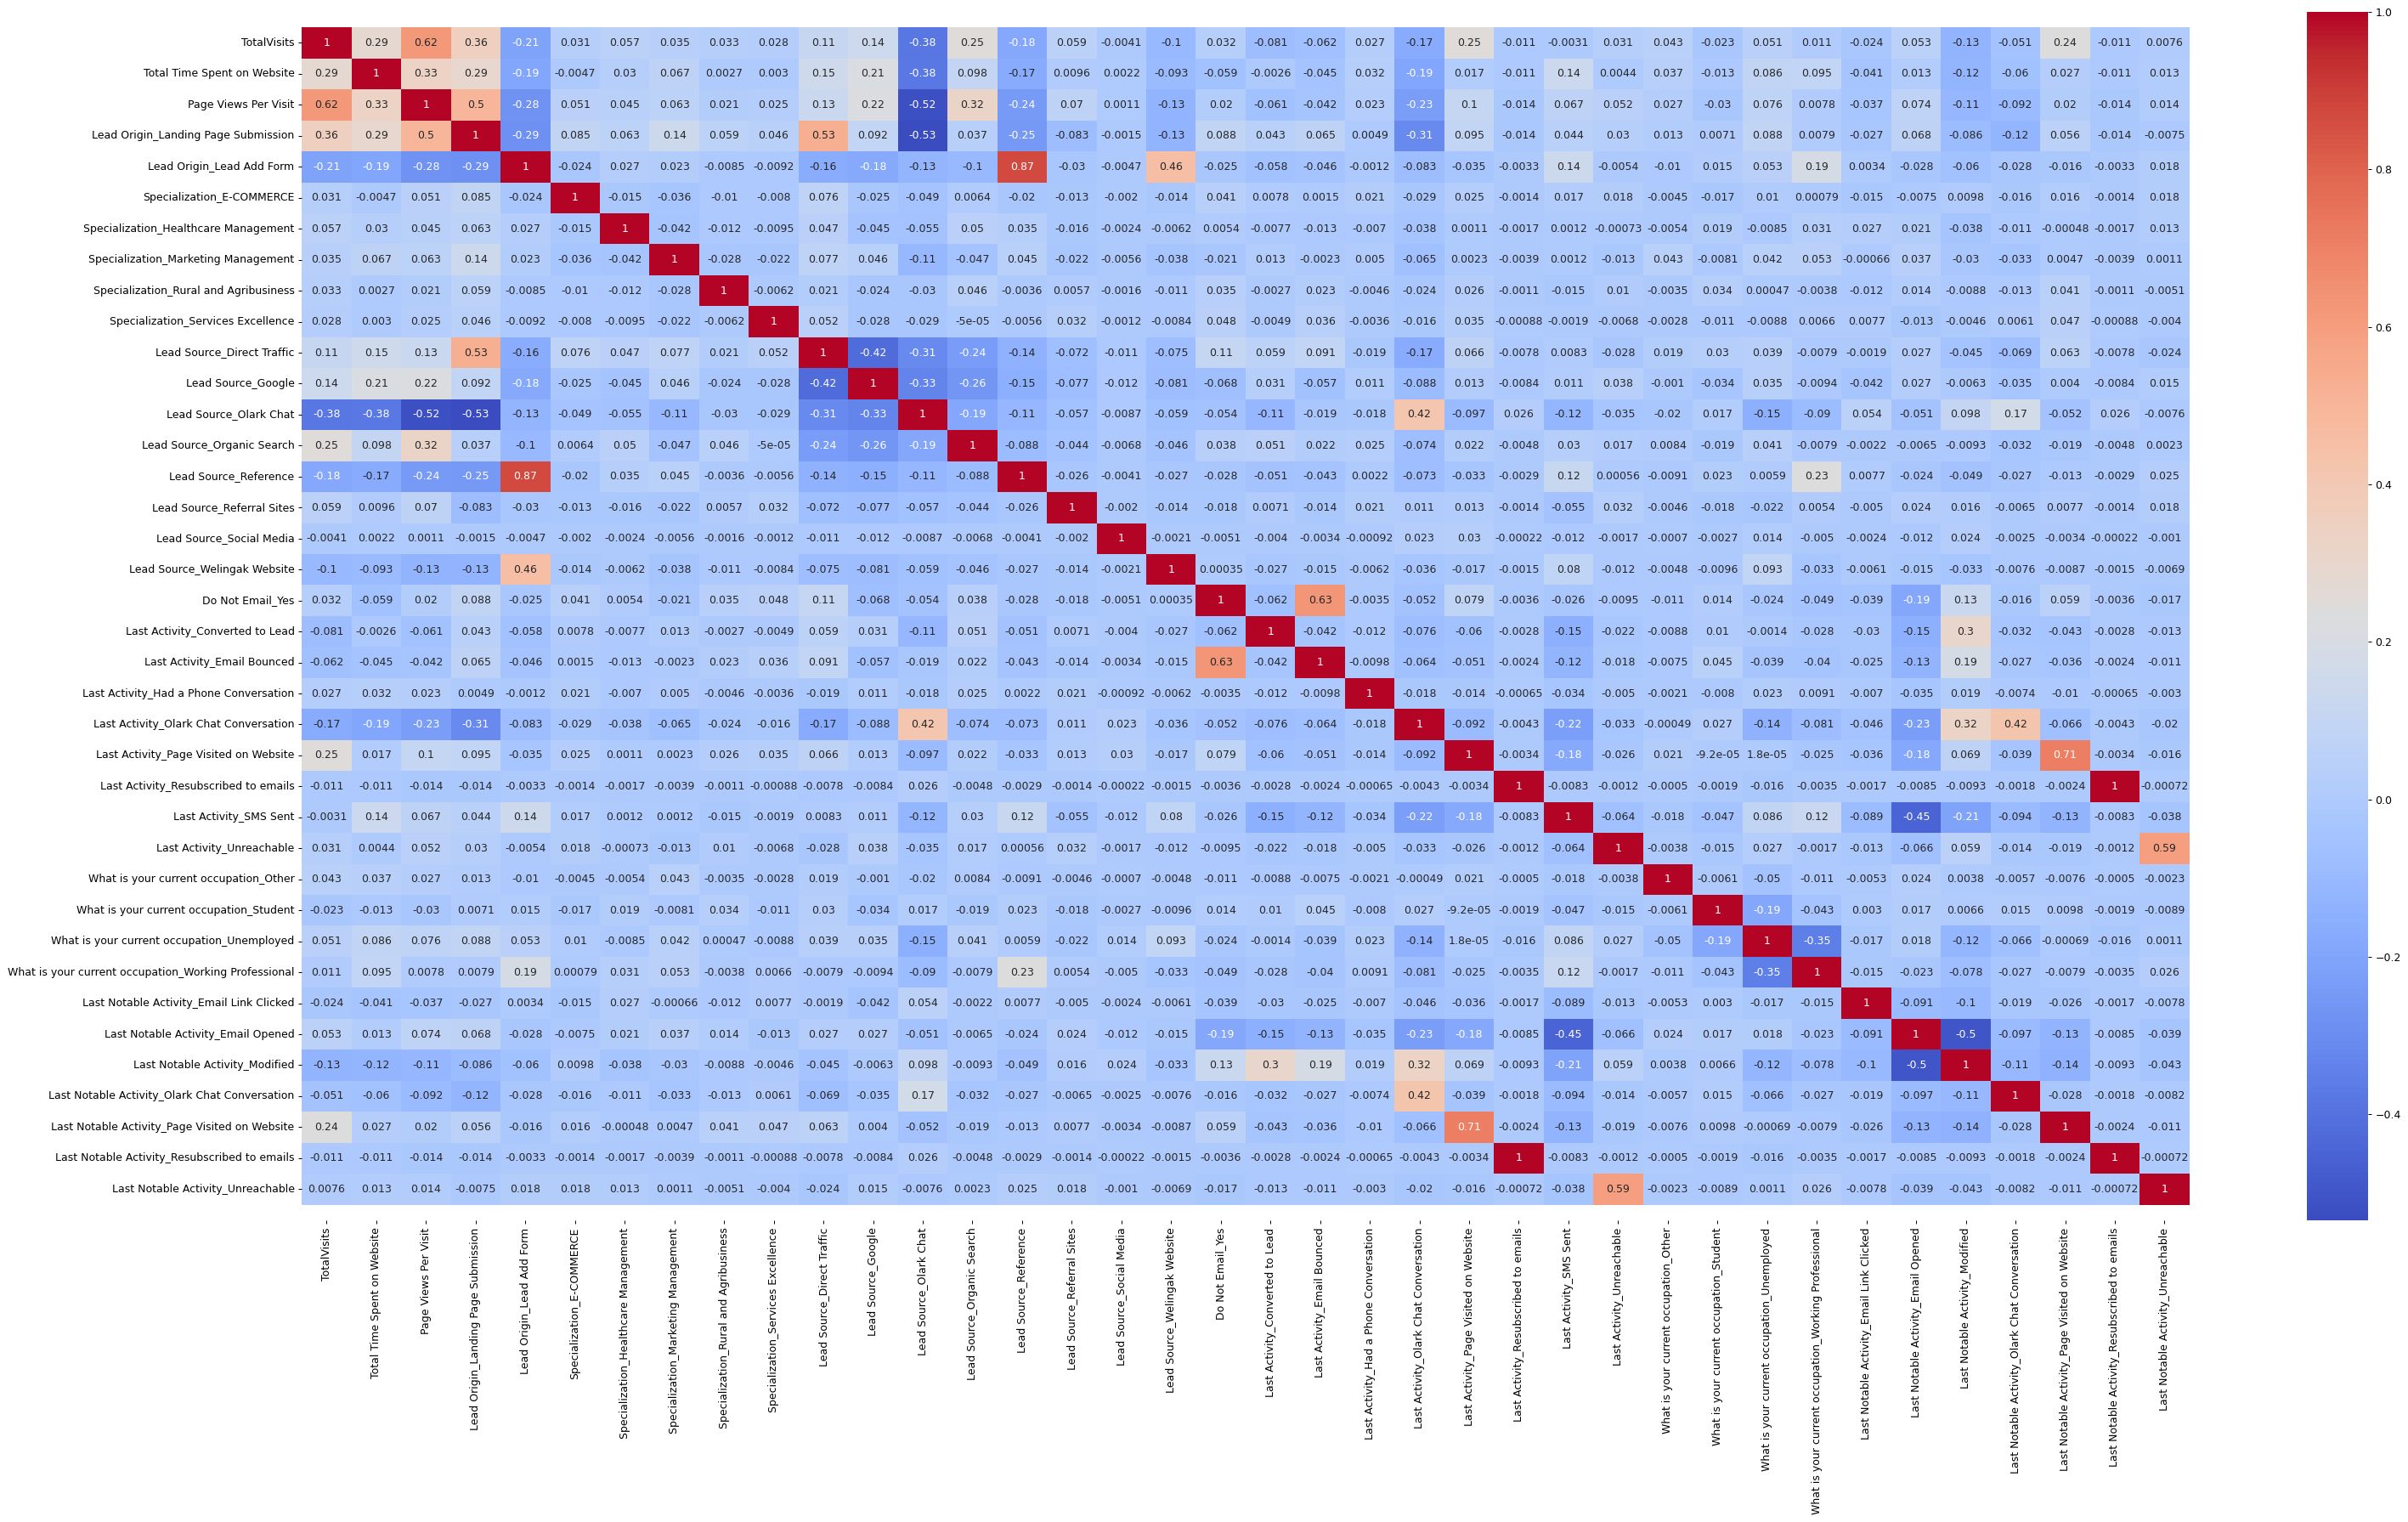

In [76]:
# Slightly alter the figure size to make it more horizontal.
plt.figure(figsize=(35,20), dpi=90, facecolor='w', edgecolor='k', frameon='True')

cor = X_train[col].corr()
ax = sns.heatmap(cor, annot=True, cmap="coolwarm")

bottom,top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

plt.tight_layout()
plt.show()

Our latest model have the following features:

- All variables have low p-value.
- All the features have very low VIF which means that there is hardly any muliticollinearity among the features. This is also evident from the heat map.

# Creating Prediction

In [77]:
# Predicting the probabilities on the train set
y_train_pred = res2.predict(X_train_sm)
y_train_pred[:10]

1289    0.708421
3604    0.092967
5584    0.235408
7679    0.098810
7563    0.270791
7978    0.867011
7780    0.163313
7863    0.985863
838     0.647679
708     0.183567
dtype: float64

In [78]:
# Reshaping to an array
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.70842124, 0.09296703, 0.23540757, 0.0988101 , 0.27079136,
       0.86701133, 0.16331254, 0.98586341, 0.64767868, 0.18356728])

In [79]:
# Data frame with given convertion rate and probablity of predicted ones
y_train_pred_final = pd.DataFrame({'Converted':y_train.values, 'Conversion_Probability':y_train_pred})
y_train_pred_final['LeadID'] = y_train.index
y_train_pred_final.head()

,Converted,Conversion_Probability,LeadID
0,1,0.708421,1289
1,0,0.092967,3604
2,0,0.235408,5584
3,0,0.098810,7679
4,0,0.270791,7563


In [80]:
# Substituting 0 or 1 with the cut off as 0.5
y_train_pred_final['Predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.5 else 0)

y_train_pred_final['Lead_Score']=y_train_pred_final['Conversion_Probability'].apply(lambda x:int(x*100))
y_train_pred_final.head()

,Converted,Conversion_Probability,LeadID,Predicted,Lead_Score
0,1,0.708421,1289,1,70
1,0,0.092967,3604,0,9
2,0,0.235408,5584,0,23
3,0,0.098810,7679,0,9
4,0,0.270791,7563,0,27


# Model Evaluation

## Making Prediction on the Train Set

In [81]:
# Creating confusion matrix 
confusionmatrix = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusionmatrix

array([[3446,  449],
       [ 709, 1747]], dtype=int64)

In [82]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.Predicted)

0.8176665092111478

In [83]:
# Substituting the value of true positive
TP = confusionmatrix[1,1]
# Substituting the value of true negatives
TN = confusionmatrix[0,0]
# Substituting the value of false positives
FP = confusionmatrix[0,1] 
# Substituting the value of false negatives
FN = confusionmatrix[1,0]

In [84]:
# Calculating the sensitivity
TP/(TP+FN)

0.7113192182410424

In [85]:

# Calculating the specificity
TN/(TN+FP)

0.8847240051347882

In [86]:
# Calculate false postive rate
print(FP/ float(TN+FP))

0.11527599486521181


In [87]:
# positive predictive value 
print (TP / float(TP+FP))

0.7955373406193078


In [88]:
# Negative predictive value
print (TN / float(TN+ FN))

0.8293622141997593


### Plotting the ROC Curve

In [89]:
# ROC function
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [90]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability, drop_intermediate = False )

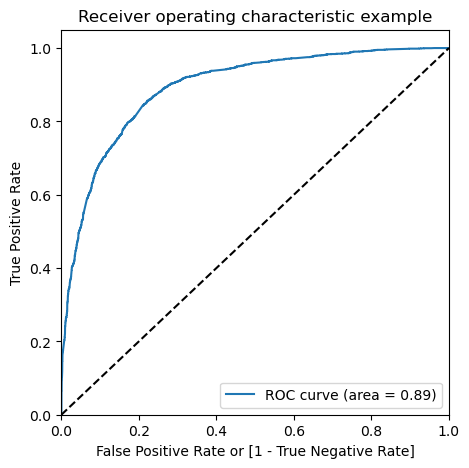

In [91]:
# Call the ROC function
draw_roc(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

#### Calculating the area under the curve(GINI)

In [92]:
def auc_val(fpr,tpr):
    AreaUnderCurve = 0.
    for i in range(len(fpr)-1):
        AreaUnderCurve += (fpr[i+1]-fpr[i]) * (tpr[i+1]+tpr[i])
    AreaUnderCurve *= 0.5
    return AreaUnderCurve

In [93]:
auctualarea = auc_val(fpr,tpr)
auctualarea

0.8922156004733354

#### Finding Optimal Cutoff Point : 
 
##### Optimal cutoff probability is that probility where we get balanced sensitivity and specificity

In [94]:
# Creating columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_final[i]= y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > i else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,LeadID,Predicted,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.708421,1289,1,70,1,1,1,1,1,1,1,1,0,0
1,0,0.092967,3604,0,9,1,0,0,0,0,0,0,0,0,0
2,0,0.235408,5584,0,23,1,1,1,0,0,0,0,0,0,0
3,0,0.098810,7679,0,9,1,0,0,0,0,0,0,0,0,0
4,0,0.270791,7563,0,27,1,1,1,0,0,0,0,0,0,0


In [95]:
# Creating a dataframe to see the values of accuracy, sensitivity, and specificity at different values of probabiity cutoffs
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
# Making confusing matrix to find values of sensitivity, accurace and specificity for each level of probablity
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    speci = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensi = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
cutoff_df

,prob,accuracy,sensi,speci
0.0,0.0,0.386711,1.000000,0.000000
0.1,0.1,0.635490,0.969463,0.424904
0.2,0.2,0.770587,0.921417,0.675481
0.3,0.3,0.802866,0.869707,0.760719
0.4,0.4,0.816722,0.787052,0.835430
0.5,0.5,0.817667,0.711319,0.884724
0.6,0.6,0.811368,0.642915,0.917587
0.7,0.7,0.784916,0.527280,0.947368
0.8,0.8,0.756259,0.423860,0.965854
0.9,0.9,0.710754,0.274430,0.985879


<Figure size 2000x1000 with 0 Axes>

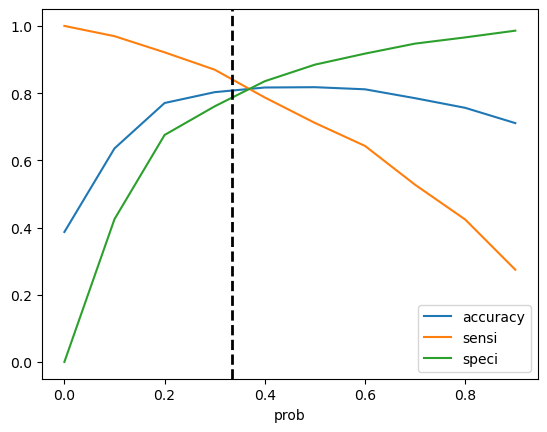

In [96]:
# Plotting it
plt.figure(figsize = (20,10))
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])
plt.axvline(x=0.335, c='black', lw=2, linestyle='--')
plt.show()

In [97]:
#### From the curve above, 0.35 is the optimum point to take it as a cutoff probability.

y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map( lambda x: 1 if x > 0.35 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,LeadID,Predicted,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.708421,1289,1,70,1,1,1,1,1,1,1,1,0,0,1
1,0,0.092967,3604,0,9,1,0,0,0,0,0,0,0,0,0,0
2,0,0.235408,5584,0,23,1,1,1,0,0,0,0,0,0,0,0
3,0,0.098810,7679,0,9,1,0,0,0,0,0,0,0,0,0,0
4,0,0.270791,7563,0,27,1,1,1,0,0,0,0,0,0,0,0


In [98]:
# Check the overall accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.8096362777515352

In [99]:
# Creating confusion matrix 
confusionmatrix2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusionmatrix2

array([[3066,  829],
       [ 380, 2076]], dtype=int64)

In [100]:
# Substituting the value of true positive
TP = confusionmatrix2[1,1]
# Substituting the value of true negatives
TN = confusionmatrix2[0,0]
# Substituting the value of false positives
FP = confusionmatrix2[0,1] 
# Substituting the value of false negatives
FN = confusionmatrix2[1,0]

In [101]:
# Let's see the sensitivity of our logistic regression model
print("Sensitivity of the logistic regression model is:  ",TP/ float(TP+FN))

Sensitivity of the logistic regression model is:   0.8452768729641694


In [102]:
# Let us calculate specificity
print("Specificity of the logistic regression model is: ",TN / float(TN+FP))

Specificity of the logistic regression model is:  0.7871630295250321


In [103]:
# Calculate false postive rate
print("False positive rate:",FP/ float(TN+FP))

# Positive predictive value 
print("Positive Predictive rate:",TP / float(TP+FP))

# Negative predictive value
print("Negative Predictive rate:",TN / float(TN+ FN))

False positive rate: 0.2128369704749679
Positive Predictive rate: 0.7146299483648881
Negative Predictive rate: 0.889727219965177


In [104]:
#classification report

from sklearn.metrics import classification_report,recall_score,roc_auc_score,roc_curve,accuracy_score,precision_score,precision_recall_curve,confusion_matrix

print(classification_report(y_train_pred_final.Converted, y_train_pred_final.final_predicted ))

              precision    recall  f1-score   support

           0       0.89      0.79      0.84      3895
           1       0.71      0.85      0.77      2456

    accuracy                           0.81      6351
   macro avg       0.80      0.82      0.80      6351
weighted avg       0.82      0.81      0.81      6351



Note: With the current cut-off as 0.35 we have accuracy: 80.83%, specificity: 78.1% and sensitivity: 85.17%

### Precision-Recall

In [105]:
confusion = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.Predicted )
confusion

array([[3446,  449],
       [ 709, 1747]], dtype=int64)

In [106]:
# Precision = TP / TP + FP
confusion[1,1]/(confusion[0,1]+confusion[1,1])

0.7955373406193078

In [107]:
#Recall = TP / TP + FN
confusion[1,1]/(confusion[1,0]+confusion[1,1])

0.7113192182410424

### Precision and Recall TradeOff

In [108]:
y_train_pred_final.Converted, y_train_pred_final.Predicted

(0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    1
 Name: Converted, Length: 6351, dtype: int64,
 0       1
 1       0
 2       0
 3       0
 4       0
        ..
 6346    0
 6347    0
 6348    0
 6349    0
 6350    0
 Name: Predicted, Length: 6351, dtype: int64)

In [109]:
p, r, thresholds = precision_recall_curve(y_train_pred_final.Converted, y_train_pred_final.Conversion_Probability)

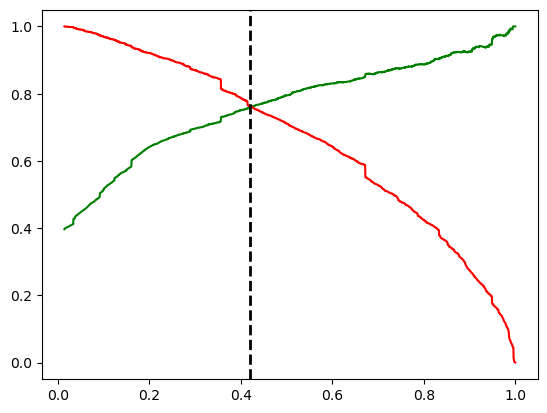

In [110]:
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.axvline(x=0.42, c='black', lw=2, linestyle='--')
plt.show()

From the precision-recall graph above, we get the optical threshold value as close to 0.42. Thus we can safely choose to consider any Prospect Lead with Conversion Probability higher than 42% to be a hot Lead.

In [111]:
y_train_pred_final['final_predicted'] = y_train_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.42 else 0)
y_train_pred_final.head()

,Converted,Conversion_Probability,LeadID,Predicted,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.708421,1289,1,70,1,1,1,1,1,1,1,1,0,0,1
1,0,0.092967,3604,0,9,1,0,0,0,0,0,0,0,0,0,0
2,0,0.235408,5584,0,23,1,1,1,0,0,0,0,0,0,0,0
3,0,0.098810,7679,0,9,1,0,0,0,0,0,0,0,0,0,0
4,0,0.270791,7563,0,27,1,1,1,0,0,0,0,0,0,0,0


In [112]:
# Accuracy
metrics.accuracy_score(y_train_pred_final.Converted, y_train_pred_final.final_predicted)

0.814832309872461

In [113]:
# Creating confusion matrix again
confusionmatrix2 = metrics.confusion_matrix(y_train_pred_final.Converted, y_train_pred_final.final_predicted )
confusionmatrix2

array([[3303,  592],
       [ 584, 1872]], dtype=int64)

In [114]:
# Substituting the value of true positive
TP = confusionmatrix2[1,1]
# Substituting the value of true negatives
TN = confusionmatrix2[0,0]
# Substituting the value of false positives
FP = confusionmatrix2[0,1] 
# Substituting the value of false negatives
FN = confusionmatrix2[1,0]

In [115]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7597402597402597

In [116]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.762214983713355

## Making Prediction on Test Set

In [117]:
# Scaling numeric values
X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']] = scaler.transform(X_test[['TotalVisits', 'Page Views Per Visit', 'Total Time Spent on Website']])

In [118]:
# Substituting all the columns in the final train model
col = X_train.columns

In [119]:
# Select the columns in X_train for X_test as well
X_test = X_test[col]
# Add a constant to X_test
X_test_sm = sm.add_constant(X_test[col])
X_test_sm.head()


,const,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Specialization_E-COMMERCE,Specialization_Healthcare Management,Specialization_Marketing Management,Specialization_Rural and Agribusiness,...,What is your current occupation_Student,What is your current occupation_Unemployed,What is your current occupation_Working Professional,Last Notable Activity_Email Link Clicked,Last Notable Activity_Email Opened,Last Notable Activity_Modified,Last Notable Activity_Olark Chat Conversation,Last Notable Activity_Page Visited on Website,Last Notable Activity_Resubscribed to emails,Last Notable Activity_Unreachable
8308,1.0,0.035461,0.416813,0.208333,1,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
7212,1.0,0.028369,0.001320,0.166667,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2085,1.0,0.000000,0.000000,0.000000,0,1,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0
4048,1.0,0.028369,0.617077,0.083333,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
4790,1.0,0.028369,0.005282,0.083333,1,0,0,0,0,0,...,0,1,0,0,1,0,0,0,0,0


In [120]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res2.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['LeadID'] = y_test_df.index
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Probability'})

y_pred_final.head()

,Converted,LeadID,Conversion_Probability
0,0,8308,0.209205
1,1,7212,0.849726
2,1,2085,0.985863
3,1,4048,0.883539
4,0,4790,0.164359


In [121]:
# Making prediction using cut off 0.35
y_pred_final['final_predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.35 else 0)
y_pred_final['Lead_Score']=y_pred_final['Conversion_Probability'].apply(lambda x:int(x*100))
y_pred_final.head()

,Converted,LeadID,Conversion_Probability,final_predicted,Lead_Score
0,0,8308,0.209205,0,20
1,1,7212,0.849726,1,84
2,1,2085,0.985863,1,98
3,1,4048,0.883539,1,88
4,0,4790,0.164359,0,16


In [122]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8090341535071612

In [123]:
# Creating confusion matrix 
confusionmatrix2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusionmatrix2

array([[1372,  372],
       [ 148,  831]], dtype=int64)

In [124]:
# Substituting the value of true positive
TP = confusionmatrix2[1,1]
# Substituting the value of true negatives
TN = confusionmatrix2[0,0]
# Substituting the value of false positives
FP = confusionmatrix2[0,1] 
# Substituting the value of false negatives
FN = confusionmatrix2[1,0]

In [125]:
# Calculating the sensitivity
TP/(TP+FN)

0.8488253319713994

In [126]:
# Calculating the specificity
TN/(TN+FP)

0.786697247706422

In [127]:
# Storing prediction of test set in the variable 'y_test_pred'
y_test_pred = res2.predict(X_test_sm)
# Coverting it to df
y_pred_df = pd.DataFrame(y_test_pred)
# Converting y_test to dataframe
y_test_df = pd.DataFrame(y_test)
y_test_df['LeadID'] = y_test_df.index
# Remove index for both dataframes to append them side by side 
y_pred_df.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)
# Append y_test_df and y_pred_df
y_pred_final = pd.concat([y_test_df, y_pred_df],axis=1)
# Renaming column 
y_pred_final= y_pred_final.rename(columns = {0 : 'Conversion_Probability'})
y_pred_final.head()

,Converted,LeadID,Conversion_Probability
0,0,8308,0.209205
1,1,7212,0.849726
2,1,2085,0.985863
3,1,4048,0.883539
4,0,4790,0.164359


In [128]:
# Making prediction using cut off 0.42
y_pred_final['final_predicted'] = y_pred_final.Conversion_Probability.map(lambda x: 1 if x > 0.42 else 0)
y_pred_final['Lead_Score']=y_pred_final['Conversion_Probability'].apply(lambda x:int(x*100))
y_pred_final.head()

,Converted,LeadID,Conversion_Probability,final_predicted,Lead_Score
0,0,8308,0.209205,0,20
1,1,7212,0.849726,1,84
2,1,2085,0.985863,1,98
3,1,4048,0.883539,1,88
4,0,4790,0.164359,0,16


In [129]:
# Check the overall accuracy
metrics.accuracy_score(y_pred_final['Converted'], y_pred_final.final_predicted)

0.8237238340066103

In [130]:
# Creating confusion matrix 
confusionmatrix2 = metrics.confusion_matrix(y_pred_final['Converted'], y_pred_final.final_predicted )
confusionmatrix2

array([[1488,  256],
       [ 224,  755]], dtype=int64)

In [131]:
# Substituting the value of true positive
TP = confusionmatrix2[1,1]
# Substituting the value of true negatives
TN = confusionmatrix2[0,0]
# Substituting the value of false positives
FP = confusionmatrix2[0,1] 
# Substituting the value of false negatives
FN = confusionmatrix2[1,0]

In [132]:
# Precision = TP / TP + FP
TP / (TP + FP)

0.7467853610286844

In [133]:
#Recall = TP / TP + FN
TP / (TP + FN)

0.7711950970377937

# Calculating Lead score for the entire dataset


In [134]:
# Selecting the test dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_test_pred = y_pred_final.copy()
leads_test_pred.head()

,Converted,LeadID,Conversion_Probability,final_predicted,Lead_Score
0,0,8308,0.209205,0,20
1,1,7212,0.849726,1,84
2,1,2085,0.985863,1,98
3,1,4048,0.883539,1,88
4,0,4790,0.164359,0,16


In [135]:
# Selecting the train dataset along with the Conversion Probability and final predicted value for 'Converted'
leads_train_pred = y_train_pred_final.copy()
leads_train_pred.head()

,Converted,Conversion_Probability,LeadID,Predicted,Lead_Score,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,1,0.708421,1289,1,70,1,1,1,1,1,1,1,1,0,0,1
1,0,0.092967,3604,0,9,1,0,0,0,0,0,0,0,0,0,0
2,0,0.235408,5584,0,23,1,1,1,0,0,0,0,0,0,0,0
3,0,0.098810,7679,0,9,1,0,0,0,0,0,0,0,0,0,0
4,0,0.270791,7563,0,27,1,1,1,0,0,0,0,0,0,0,0


In [136]:
# Dropping unnecessary columns from train dataset
leads_train_pred = leads_train_pred[['LeadID','Converted','Conversion_Probability','final_predicted']]
leads_train_pred.head()

,LeadID,Converted,Conversion_Probability,final_predicted
0,1289,1,0.708421,1
1,3604,0,0.092967,0
2,5584,0,0.235408,0
3,7679,0,0.098810,0
4,7563,0,0.270791,0


In [137]:
# Concatenating the 2 dataframes train and test along the rows with the append() function
lead_full_pred = leads_train_pred.append(leads_test_pred)
lead_full_pred.head()

,LeadID,Converted,Conversion_Probability,final_predicted,Lead_Score
0,1289,1,0.708421,1,NaN
1,3604,0,0.092967,0,NaN
2,5584,0,0.235408,0,NaN
3,7679,0,0.098810,0,NaN
4,7563,0,0.270791,0,NaN


In [138]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(leads_train_pred.shape)
print(leads_test_pred.shape)
print(lead_full_pred.shape)

(6351, 4)
(2723, 5)
(9074, 5)


In [139]:
# Ensuring the LeadIDs are unique for each lead in the finl dataframe
len(lead_full_pred['LeadID'].unique().tolist())

9074

In [140]:
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Conversion_Probability'].apply(lambda x : round(x*100))
lead_full_pred.head()

,LeadID,Converted,Conversion_Probability,final_predicted,Lead_Score
0,1289,1,0.708421,1,71
1,3604,0,0.092967,0,9
2,5584,0,0.235408,0,24
3,7679,0,0.098810,0,10
4,7563,0,0.270791,0,27


In [141]:
# We will later join it with the original_leads dataframe based on index
lead_full_pred = lead_full_pred.set_index('LeadID').sort_index(axis = 0, ascending = True)
lead_full_pred.head()

,Converted,Conversion_Probability,final_predicted,Lead_Score
LeadID,,,,
0,0,0.184130,0,18
1,0,0.419851,0,42
2,1,0.738005,1,74
3,0,0.059097,0,6
4,1,0.506093,1,51


In [142]:
# Slicing the Lead Number column from original leads dataframe
leadscore = leadscore[['Lead Number']]
leadscore.head()

,Lead Number
0,660737
1,660728
2,660727
3,660719
4,660681


**Concatenating the 2 dataframes based on index.**

**This is done so that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.**

In [143]:
# Concatenating the 2 dataframes based on index and displaying the top 10 rows
# This is done son that Lead Score is associated to the Lead Number of each Lead. This will help in quick identification of the lead.
leads_with_score = pd.concat([leadscore, lead_full_pred], axis=1)
leads_with_score.head(10)

,Lead Number,Converted,Conversion_Probability,final_predicted,Lead_Score
0,660737,0.0,0.184130,0.0,18.0
1,660728,0.0,0.419851,0.0,42.0
2,660727,1.0,0.738005,1.0,74.0
3,660719,0.0,0.059097,0.0,6.0
4,660681,1.0,0.506093,1.0,51.0
5,660680,0.0,0.033685,0.0,3.0
6,660673,1.0,0.748082,1.0,75.0
7,660664,0.0,0.033685,0.0,3.0
8,660624,0.0,0.039521,0.0,4.0
9,660616,0.0,0.060779,0.0,6.0


# Determining Feature Importance

In [144]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res2.params[1:]
new_params

TotalVisits                                             8.79
Total Time Spent on Website                             4.65
Page Views Per Visit                                   -2.26
Lead Origin_Landing Page Submission                    -0.23
Lead Origin_Lead Add Form                               0.95
Specialization_E-COMMERCE                               0.40
Specialization_Healthcare Management                    0.26
Specialization_Marketing Management                     0.35
Specialization_Rural and Agribusiness                   0.36
Specialization_Services Excellence                      0.50
Lead Source_Direct Traffic                             -0.72
Lead Source_Google                                     -0.41
Lead Source_Olark Chat                                  0.67
Lead Source_Organic Search                             -0.52
Lead Source_Reference                                   1.91
Lead Source_Referral Sites                             -0.44
Lead Source_Social Media

In [145]:
#feature_importance = abs(new_params)
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance

TotalVisits                                             82.29
Total Time Spent on Website                             43.53
Page Views Per Visit                                   -21.19
Lead Origin_Landing Page Submission                     -2.14
Lead Origin_Lead Add Form                                8.93
Specialization_E-COMMERCE                                3.74
Specialization_Healthcare Management                     2.45
Specialization_Marketing Management                      3.28
Specialization_Rural and Agribusiness                    3.38
Specialization_Services Excellence                       4.67
Lead Source_Direct Traffic                              -6.78
Lead Source_Google                                      -3.84
Lead Source_Olark Chat                                   6.23
Lead Source_Organic Search                              -4.88
Lead Source_Reference                                   17.90
Lead Source_Referral Sites                              -4.13
Lead Sou

Sorting the feature variables based on their relative coefficient values

In [146]:
sorted_idx = np.argsort(feature_importance,kind='quicksort',order='list of str')
sorted_idx

TotalVisits                                              2
Total Time Spent on Website                             31
Page Views Per Visit                                    22
Lead Origin_Landing Page Submission                     18
Lead Origin_Lead Add Form                               33
Specialization_E-COMMERCE                               34
Specialization_Healthcare Management                    20
Specialization_Marketing Management                     35
Specialization_Rural and Agribusiness                   32
Specialization_Services Excellence                      26
Lead Source_Direct Traffic                              19
Lead Source_Google                                      10
Lead Source_Olark Chat                                  23
Lead Source_Organic Search                              13
Lead Source_Reference                                   15
Lead Source_Referral Sites                              11
Lead Source_Social Media                                

**Plot showing the feature variables based on their relative coefficient values**

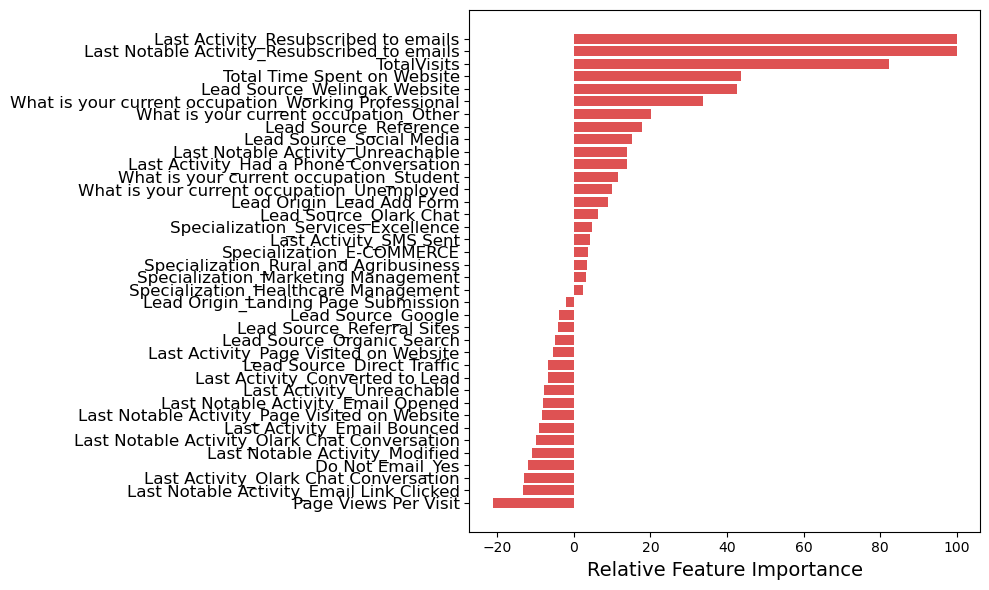

In [147]:
pos = np.arange(sorted_idx.shape[0]) + .5

featfig = plt.figure(figsize=(10,6))
featax = featfig.add_subplot(1, 1, 1)
featax.barh(pos, feature_importance[sorted_idx], align='center', color = 'tab:red',alpha=0.8)
featax.set_yticks(pos)
featax.set_yticklabels(np.array(X_train[col].columns)[sorted_idx], fontsize=12)
featax.set_xlabel('Relative Feature Importance', fontsize=14)

plt.tight_layout()   
plt.show()

Selecting Top 3 features which contribute most towards the probability of a lead getting converted

In [148]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
24,Last Activity_Resubscribed to emails,100.00
36,Last Notable Activity_Resubscribed to emails,100.00
0,TotalVisits,82.29
